In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scanpy as sc
import PyWGCNA
#from pydeseq2.dds import DeseqDataSet
#from sklearn.metrics import roc_curve, roc_auc_score

/var/tmp/pbs.221637.pbs01/ipykernel_90861/407655379.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
same_module = pd.read_csv("/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/liver/tumor/liver_hepatocellular_carcinoma/same_module.csv.gz", index_col=0)

# Get idxs corresponding to upper triangle (diagonal excluded)
idxs_x, idxs_y = np.triu_indices(same_module.shape[0], 1)

same_module = same_module.values[idxs_x, idxs_y]

# LR pairs, normal vs tumor

In [52]:
df = pd.read_csv("/home/lnemati/pathway_crosstalk/code/1_compare/results.csv")
df.index = df["Name"].values
df.head(3)

Name  \
uterine_carcinosarcoma                    uterine_carcinosarcoma   
kidney_papillary_cell_carcinoma  kidney_papillary_cell_carcinoma   
kidney_chromophobe                            kidney_chromophobe   

                                 Tumor_n_modules  Normal_n_modules  \
uterine_carcinosarcoma                       101                66   
kidney_papillary_cell_carcinoma               34                43   
kidney_chromophobe                            53                43   

                                 Tumor_n_genes  Normal_n_genes  \
uterine_carcinosarcoma                   14242           13646   
kidney_papillary_cell_carcinoma          13760           14033   
kidney_chromophobe                       13474           14033   

                                 Tumor_total_gene_pairs  \
uterine_carcinosarcoma                        101410161   
kidney_papillary_cell_carcinoma                94661920   
kidney_chromophobe                             90767601   

                                 Normal_total_gene_pairs  \
uterine_carcinosarcoma                          93099835   
kidney_papillary_cell_carcinoma                 98455528   
kidney_chromophobe                              98455528   

                                 Tumor_gene_pairs_same_module  \
uterine_carcinosarcoma                                5766400   
kidney_papillary_cell_carcinoma                       7499613   
kidney_chromophobe                                    5651149   

                                 Normal_gene_pairs_same_module  \
uterine_carcinosarcoma                                 7375479   
kidney_papillary_cell_carcinoma                        7693709   
kidney_chromophobe                                     7693709   

                                 Tumor_total_LR_pairs  Normal_total_LR_pairs  \
uterine_carcinosarcoma                           1850                   1625   
kidney_papillary_cell_carcinoma                  1586                   1714   
kidney_chromophobe                               1522                   1714   

                                 Tumor_LR_pairs_same_module  \
uterine_carcinosarcoma                                  253   
kidney_papillary_cell_carcinoma                         184   
kidney_chromophobe                                      173   

                                 Normal_LR_pairs_same_module  \
uterine_carcinosarcoma                                   106   
kidney_papillary_cell_carcinoma                          142   
kidney_chromophobe                                       142   

                                 Tumor_LR_pairs_Z_score  \
uterine_carcinosarcoma                        14.838981   
kidney_papillary_cell_carcinoma                5.424649   
kidney_chromophobe                             8.300088   

                                 Normal_LR_pairs_Z_score  Tumor_same_module  \
uterine_carcinosarcoma                         -2.088137                253   
kidney_papillary_cell_carcinoma                 0.725461                184   
kidney_chromophobe                              0.725461                173   

                                 Normal_same_module  Tumor_total  Normal_total  
uterine_carcinosarcoma                          106         1850          1625  
kidney_papillary_cell_carcinoma                 142         1586          1714  
kidney_chromophobe                              142         1522          1714

In [54]:
df["Tumor_total_gene_pairs"].min()

83366328

In [55]:
df["Normal_total_gene_pairs"].min()

82876375

In [4]:
df.columns

Index(['Name', 'Tumor_n_modules', 'Normal_n_modules', 'Tumor_n_genes',
       'Normal_n_genes', 'Tumor_total_gene_pairs', 'Normal_total_gene_pairs',
       'Tumor_gene_pairs_same_module', 'Normal_gene_pairs_same_module',
       'Tumor_total_LR_pairs', 'Normal_total_LR_pairs',
       'Tumor_LR_pairs_same_module', 'Normal_LR_pairs_same_module',
       'Tumor_LR_pairs_Z_score', 'Normal_LR_pairs_Z_score',
       'Tumor_same_module', 'Normal_same_module', 'Tumor_total',
       'Normal_total'],
      dtype='object')

In [13]:
from scipy.stats import pearsonr

In [47]:
LR_pairs_n = pd.read_csv("/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/stomach/tumor/stomach_adenocarcinoma/LR_interactions.csv")
LR_pairs_t = pd.read_csv("/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/stomach/normal/LR_interactions.csv")

In [48]:
all_lr_pairs_n = set(LR_pairs_n["ligand"] + "-" + LR_pairs_n["receptor"])
all_lr_pairs_t = set(LR_pairs_t["ligand"] + "-" + LR_pairs_t["receptor"])

subset_n = LR_pairs_n.loc[LR_pairs_n["same_module"]]
subset_t = LR_pairs_t.loc[LR_pairs_t["same_module"]]

same_module_lr_pairs_n = set(subset_n["ligand"] + "-" + subset_n["receptor"])
same_module_lr_pairs_t = set(subset_t["ligand"] + "-" + subset_t["receptor"])

In [49]:
def jaccard_similarity(set1, set2):
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))
    similarity = intersection_size / union_size
    return similarity

# Calculate Jaccard similarity
js_all = jaccard_similarity(all_lr_pairs_n, all_lr_pairs_t)
js_same_module = jaccard_similarity(same_module_lr_pairs_n, same_module_lr_pairs_t)


# Print the result
print("Jaccard Similarity:")
print(f"All LR pairs: {js_all}")
print(f"Same module: {js_same_module}")

Jaccard Similarity:
All LR pairs: 0.7102892366050261
Same module: 0.2412818096135721


In [26]:
col1

'Name'

Normal_n_modules Normal_gene_pairs_same_module -0.8599195774526 0.7394616796862581


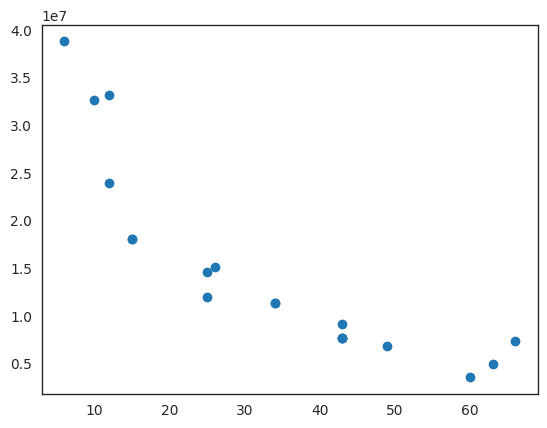

Normal_n_modules Normal_LR_pairs_same_module -0.7434727692186409 0.5527517585696345


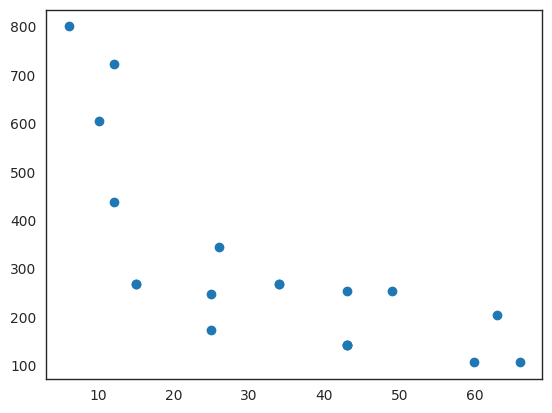

Normal_n_modules Normal_same_module -0.7434727692186409 0.5527517585696345


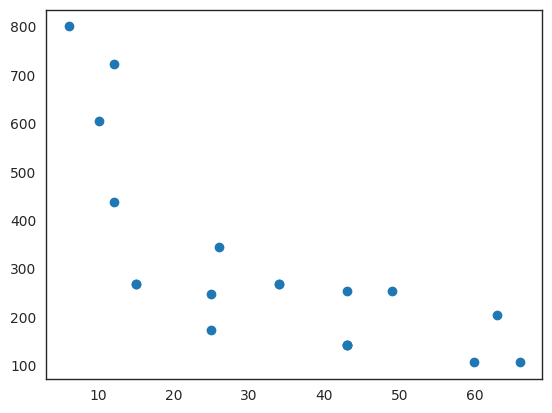

Tumor_n_genes Tumor_total_gene_pairs 0.9998570678574695 0.9997141561445364


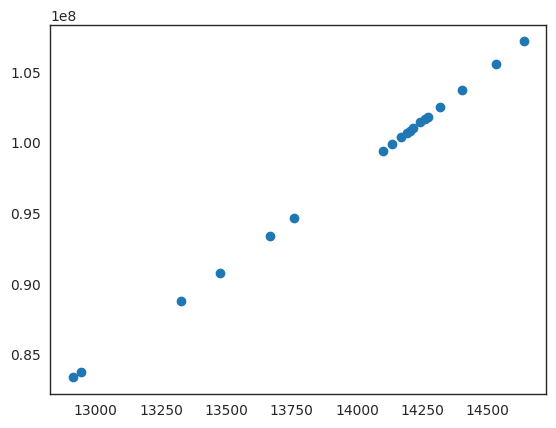

Tumor_n_genes Tumor_total_LR_pairs 0.9319676041794757 0.8685636152400318


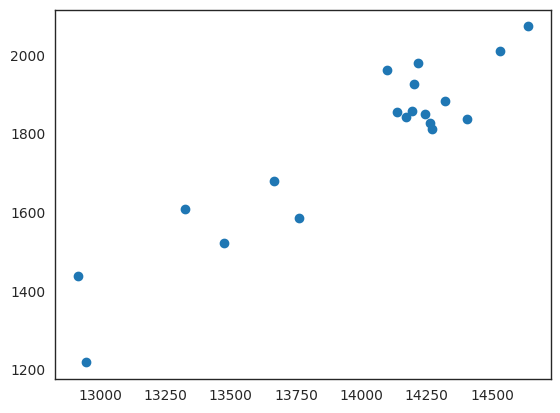

Tumor_n_genes Tumor_total 0.9319676041794757 0.8685636152400318


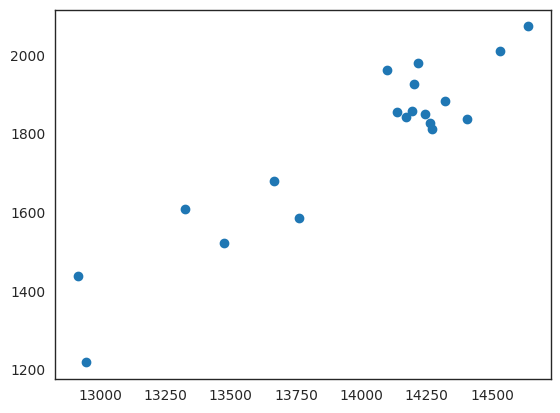

Normal_n_genes Normal_total_gene_pairs 0.9990740175143267 0.9981488924722172


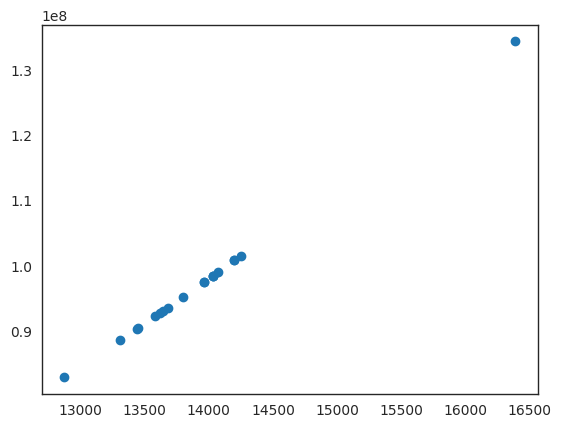

Normal_n_genes Normal_total_LR_pairs 0.8164051130632539 0.6665173086358244


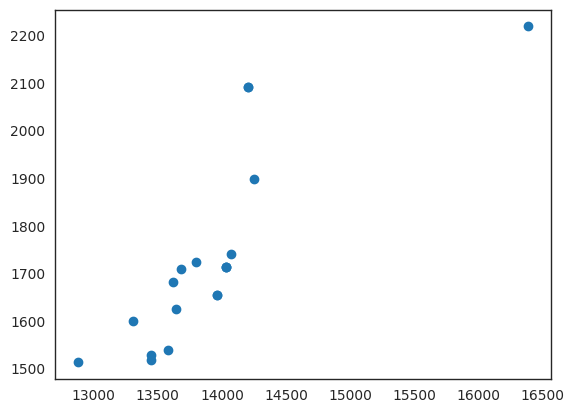

Normal_n_genes Normal_total 0.8164051130632539 0.6665173086358244


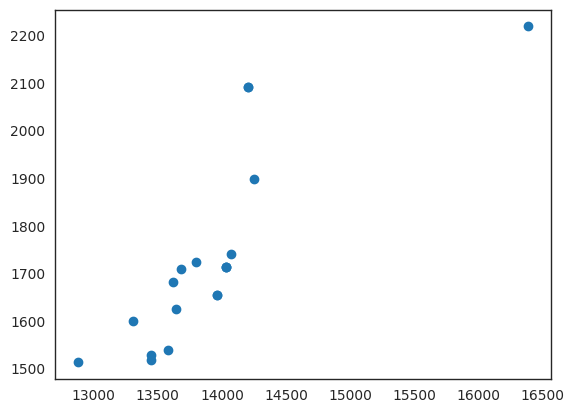

Tumor_total_gene_pairs Tumor_total_LR_pairs 0.9314442115731374 0.8675883192731035


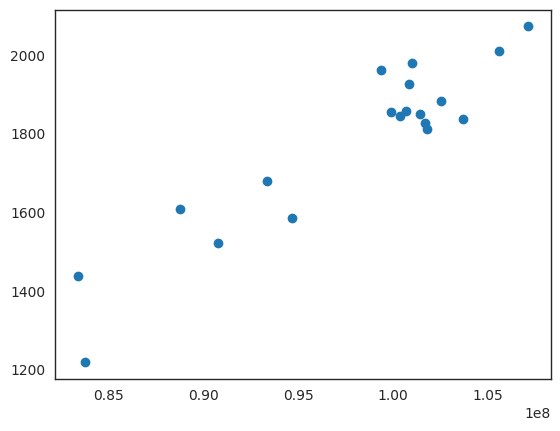

Tumor_total_gene_pairs Tumor_total 0.9314442115731374 0.8675883192731035


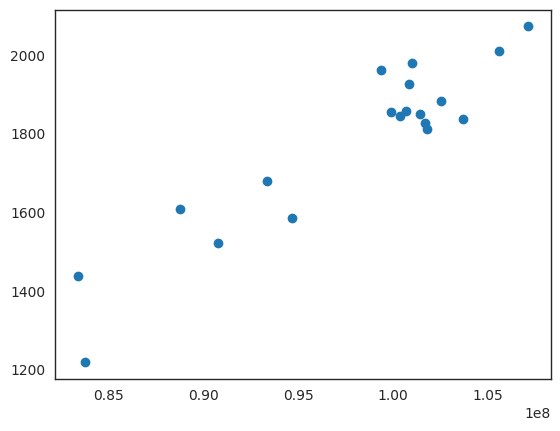

Normal_total_gene_pairs Normal_total_LR_pairs 0.8077863183363964 0.6525187360914699


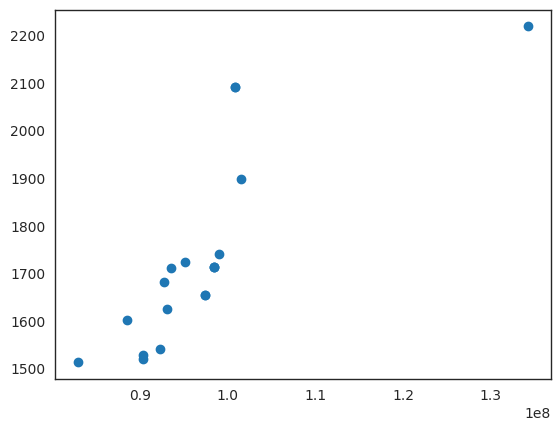

Normal_total_gene_pairs Normal_total 0.8077863183363964 0.6525187360914699


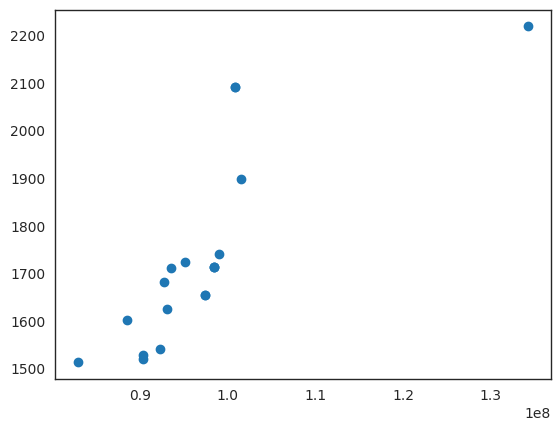

Normal_gene_pairs_same_module Normal_LR_pairs_same_module 0.9536563311051872 0.9094603978570065


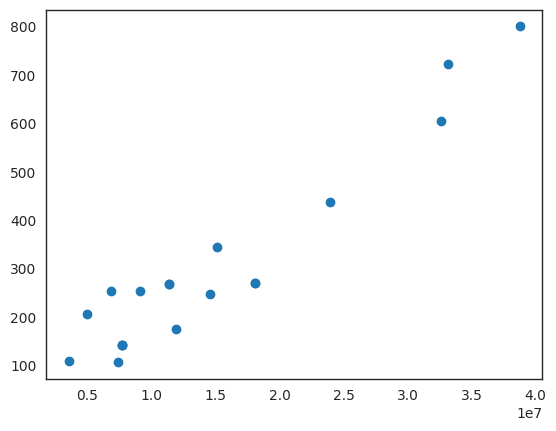

Normal_gene_pairs_same_module Normal_same_module 0.9536563311051872 0.9094603978570065


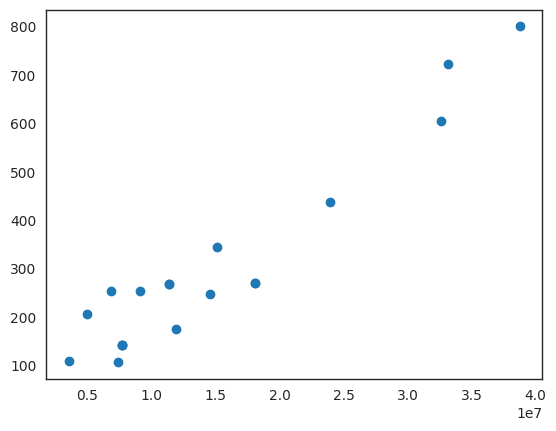

Tumor_total_LR_pairs Tumor_total 1.0 1.0


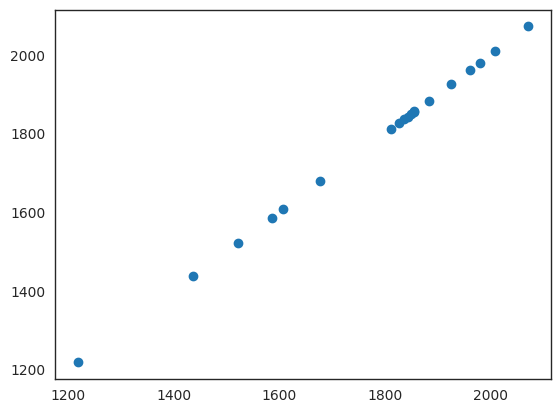

Normal_total_LR_pairs Normal_total 1.0 1.0


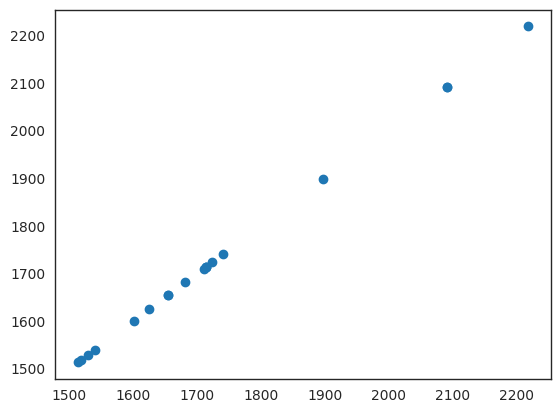

Tumor_LR_pairs_same_module Normal_LR_pairs_same_module 0.6748766269159135 0.45545846155740116


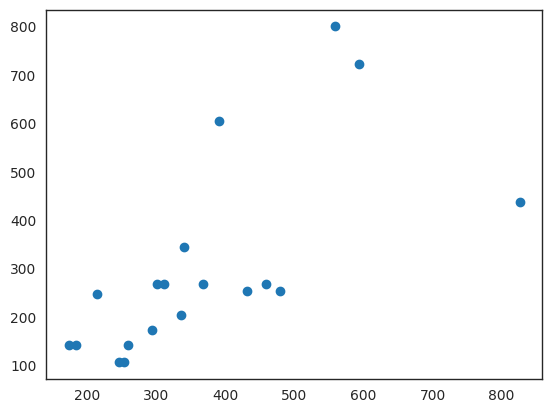

Tumor_LR_pairs_same_module Tumor_LR_pairs_Z_score 0.7021770447138085 0.4930526021230178


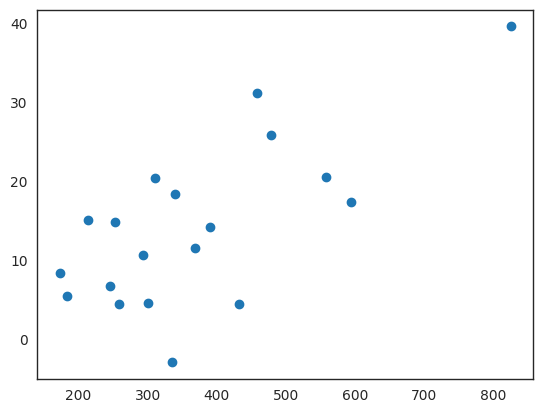

Tumor_LR_pairs_same_module Tumor_same_module 0.9999999999999999 0.9999999999999998


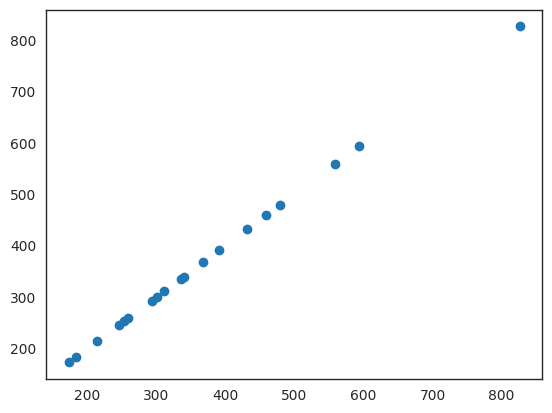

Tumor_LR_pairs_same_module Normal_same_module 0.6748766269159135 0.45545846155740116


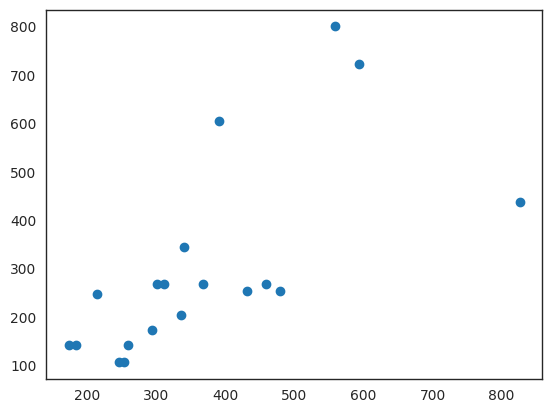

Normal_LR_pairs_same_module Tumor_same_module 0.6748766269159135 0.45545846155740116


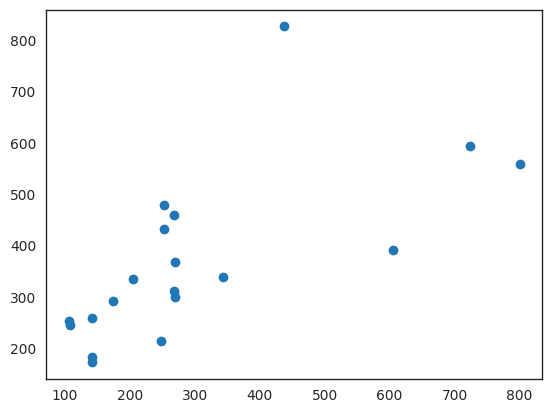

Normal_LR_pairs_same_module Normal_same_module 0.9999999999999997 0.9999999999999993


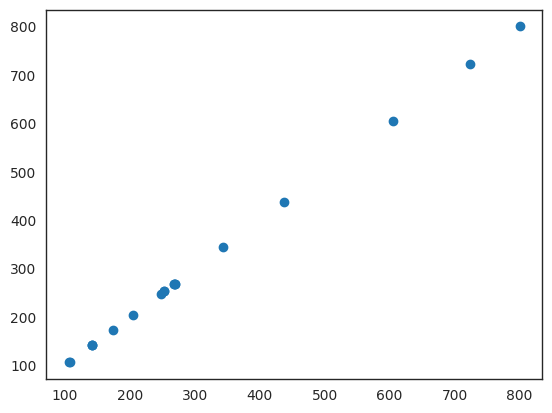

Tumor_LR_pairs_Z_score Tumor_same_module 0.7021770447138085 0.4930526021230178


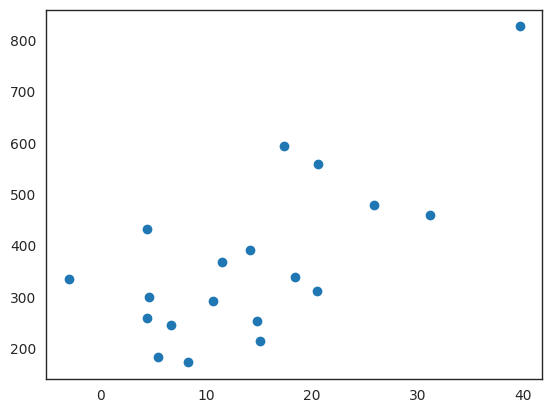

Tumor_same_module Normal_same_module 0.6748766269159135 0.45545846155740116


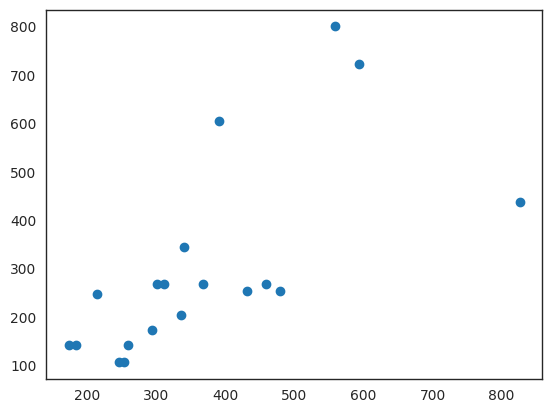

In [30]:
col1 = "Tumor_total_LR_pairs"
col2 = "Tumor_n_modules"

for i, col1 in enumerate(df.columns[1:]):
    for j, col2 in enumerate(df.columns[1:]):
        if i < j:
            res = pearsonr(df[col1], df[col2])
            if res.pvalue < 0.05/len(df.columns[1:]):
                r = pearsonr(df[col1], df[col2]).statistic
                print(col1, col2, r, r**2)
                plt.scatter(df[col1], df[col2])
                plt.show()



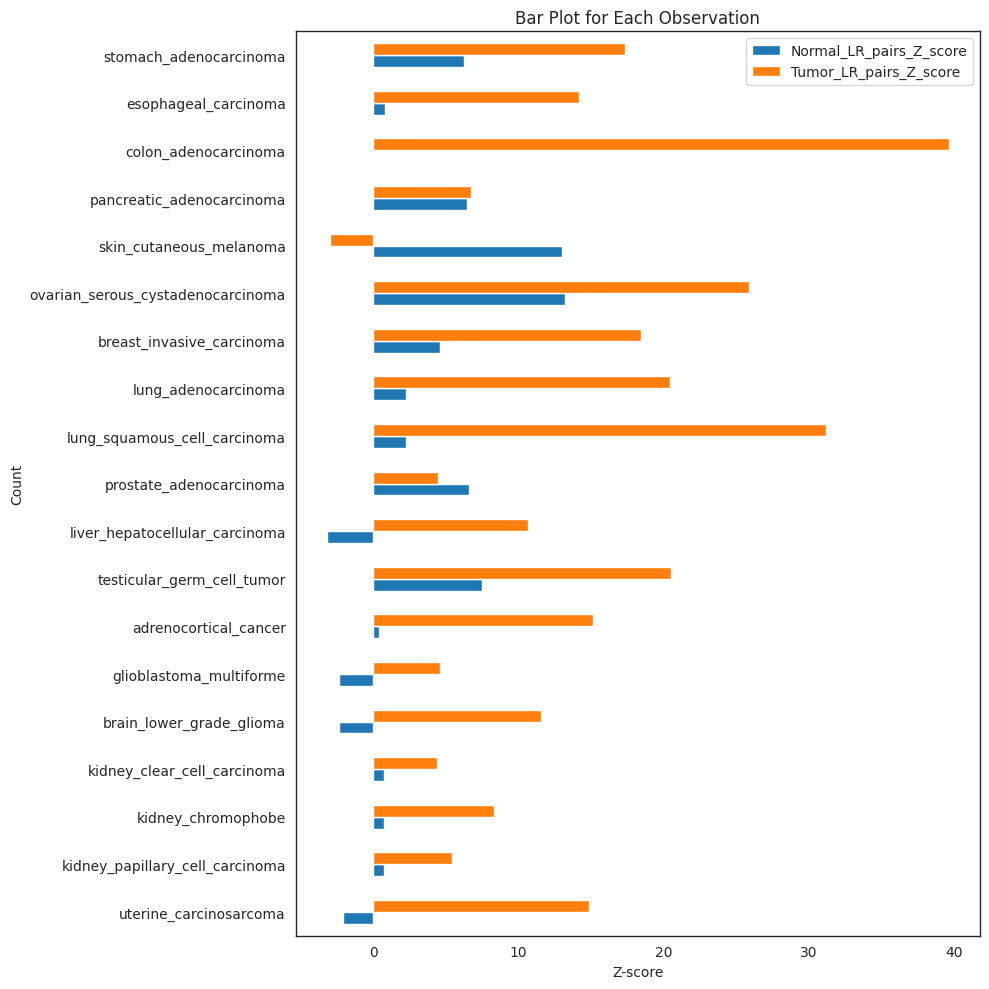

In [9]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
df[["Normal_LR_pairs_Z_score", "Tumor_LR_pairs_Z_score"]].plot(kind='barh', stacked=False, ax=ax)

# Adding labels and title
plt.xlabel('Z-score')
plt.ylabel('Count')
plt.title('Bar Plot for Each Observation')
plt.tight_layout()

In [3]:
df["Tumor_same_module"] = -df["Tumor_same_module"]

In [23]:
df["Tumor_frac"] = df["Tumor_same_module"] / df["Tumor_total"]
df["Normal_frac"] = df["Normal_same_module"] / df["Normal_total"]

In [24]:
df["Difference"] = df["Normal"] + df["Tumor"]

KeyError: 'Normal'

In [ ]:
df.index = df["Name"].values

In [25]:
df["Sum"] = df["Normal_frac"] - df["Tumor_frac"]

In [26]:
df.head(3)

Name  \
uterine_carcinosarcoma                    uterine_carcinosarcoma   
kidney_papillary_cell_carcinoma  kidney_papillary_cell_carcinoma   
kidney_chromophobe                            kidney_chromophobe   

                                 Tumor_same_module  Normal_same_module  \
uterine_carcinosarcoma                         NaN                 NaN   
kidney_papillary_cell_carcinoma                NaN                 NaN   
kidney_chromophobe                             NaN                 NaN   

                                 Tumor_total  Normal_total  Tumor_frac  \
uterine_carcinosarcoma                   NaN           NaN         NaN   
kidney_papillary_cell_carcinoma          NaN           NaN         NaN   
kidney_chromophobe                       NaN           NaN         NaN   

                                 Normal_frac  Sum  
uterine_carcinosarcoma                   NaN  NaN  
kidney_papillary_cell_carcinoma          NaN  NaN  
kidney_chromophobe                       NaN  NaN

In [27]:
df["RelativeDiff"] =  df["Normal_frac"] + df["Tumor_frac"] / df["Normal_frac"] - df["Tumor_frac"]

In [28]:
# Sort values from lowest to highest 
df.sort_values('Sum', inplace=True) 

ValueError: Axis limits cannot be NaN or Inf

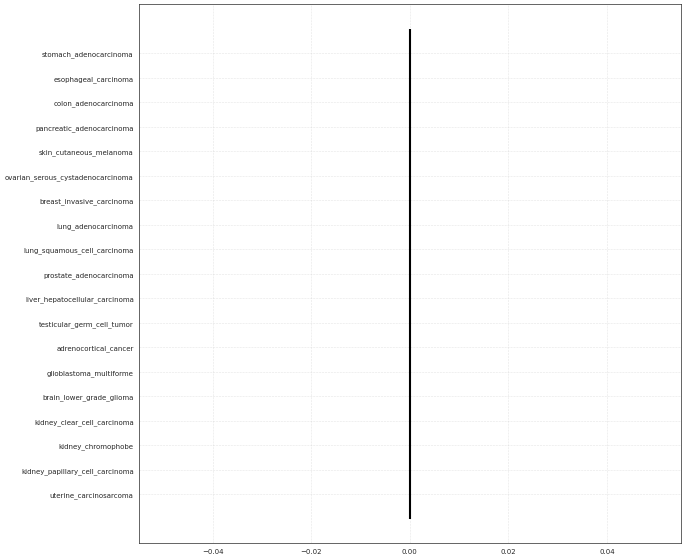

In [29]:
fig, ax = plt.subplots(figsize=(14, 14), dpi=50) 
  
lw = 35
fs = 25
bigfs = 30

# Plotting the horizontal lines 
plt.hlines(y=df.index, xmin=0, xmax=df.Normal_frac, color="#00728eff", linewidth=lw)
plt.hlines(y=df.index, xmin=0, xmax=df.Tumor_frac, color="#b72a3aff", linewidth=lw)
plt.vlines(x=0, ymin=-1, ymax=len(df), color="k", linewidth=3)

plt.grid(linestyle='--', alpha=0.5) 

width = 1.1 * np.max( [-df.Tumor_frac.min(), df.Normal_frac.max()] )

plt.xlim(-width, width)


plt.xticks(fontsize=fs) 
plt.yticks(fontsize=fs)
plt.xlabel("Fraction of LR pairs in same module", fontsize=fs)

plt.text(-width/2, len(df), "Tumor_frac", horizontalalignment='center', verticalalignment='center',fontsize=bigfs)
plt.text(+width/2, len(df), "Normal_frac", horizontalalignment='center', verticalalignment='center',fontsize=bigfs)

plt.tight_layout()

plt.savefig("/home/lnemati/barplot.png")

plt.show()

In [13]:
import liana as li

In [128]:
li.resource.select_resource("cellphonedb")

ligand  receptor
13085    JAG2    NOTCH1
13086    DLL1    NOTCH1
13087    IGF1     IGF1R
13088    JAG1    NOTCH1
13089   WNT5A      FZD2
...       ...       ...
14303    WNT1      CD36
14304     OGN  HLA-DRB1
14305  CCL4L1    PGRMC2
14306  TNFSF9     KLRG2
14307  ENTPD1    ADORA3

[1223 rows x 2 columns]

In [50]:
from scipy.stats import binom

In [84]:
n = df["Normal_total_LR_pairs"]
p = df["Normal_gene_pairs_same_module"] / df["Normal_total_gene_pairs"]

In [85]:
from scipy.stats import norm

In [103]:
1 - norm.cdf(x=df["Normal_LR_pairs_same_module"], loc=n*p, scale=np.sqrt(p*(1-p)))

array([1.       , 0.       , 0.       , 0.       , 1.       , 1.       ,
       0.       , 0.       , 1.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.2910389, 0.       ,
       0.       ])

In [108]:
df.loc[norm.sf(x=df["Normal_LR_pairs_same_module"], loc=n*p, scale=np.sqrt(p*(1-p))) < 0.05].index

Index(['kidney_papillary_cell_carcinoma', 'kidney_chromophobe',
       'kidney_clear_cell_carcinoma', 'adrenocortical_cancer',
       'testicular_germ_cell_tumor', 'prostate_adenocarcinoma',
       'lung_squamous_cell_carcinoma', 'lung_adenocarcinoma',
       'breast_invasive_carcinoma', 'ovarian_serous_cystadenocarcinoma',
       'skin_cutaneous_melanoma', 'pancreatic_adenocarcinoma',
       'esophageal_carcinoma', 'stomach_adenocarcinoma'],
      dtype='object')

In [97]:
norm.cdf(x=df["Normal_LR_pairs_Z_score"])

uterine_carcinosarcoma               0.068100
kidney_papillary_cell_carcinoma      2.853654
kidney_chromophobe                   2.853654
kidney_clear_cell_carcinoma          2.853654
brain_lower_grade_glioma             0.021812
glioblastoma_multiforme              0.021812
adrenocortical_cancer                1.768330
testicular_germ_cell_tumor           2.207137
liver_hepatocellular_carcinoma       0.001879
prostate_adenocarcinoma              3.494763
lung_squamous_cell_carcinoma         3.124520
lung_adenocarcinoma                  3.124520
breast_invasive_carcinoma            2.734682
ovarian_serous_cystadenocarcinoma    3.772106
skin_cutaneous_melanoma              4.595389
pancreatic_adenocarcinoma            5.164254
colon_adenocarcinoma                 1.157846
esophageal_carcinoma                 1.635398
stomach_adenocarcinoma               2.086824
dtype: float64

In [89]:
norm.sf(x=df["Normal_LR_pairs_same_module"], loc=n*p, scale=np.sqrt(p*(1-p)))

array([1.00000000e+000, 1.74411371e-198, 1.74411371e-198, 1.74411371e-198,
       1.00000000e+000, 1.00000000e+000, 4.43160216e-048, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       2.91038903e-001, 2.29068957e-226, 0.00000000e+000])

In [90]:
norm.sf(x=df["Normal_LR_pairs_Z_score"])

array([9.81607242e-01, 2.34084743e-01, 2.34084743e-01, 2.34084743e-01,
       9.91524272e-01, 9.91524272e-01, 3.55676161e-01, 3.16613080e-14,
       9.99340365e-01, 1.98200938e-11, 1.22536099e-02, 1.22536099e-02,
       1.96561243e-06, 5.24117929e-40, 4.61835057e-39, 5.33823505e-11,
       4.94690668e-01, 2.11213005e-01, 2.31890406e-10])

In [64]:
p.max()

0.2404566113613895

In [168]:
for resource in li.resource.show_resources():
    df = li.resource.select_resource(resource)
    path = os.path.join("/projects/bioinformatics/DB/CellCellCommunication/LianaResources", str(resource+".csv"))
    df.to_csv(path, index=False)
    print(resource, df.shape)

baccin2019 (1648, 2)
cellcall (1123, 2)
cellchatdb (1912, 2)
cellinker (3701, 2)
cellphonedb (1223, 2)
celltalkdb (3392, 2)
connectomedb2020 (2266, 2)
consensus (4701, 2)
embrace (1650, 2)
guide2pharma (665, 2)
hpmr (595, 2)
icellnet (738, 2)
italk (2566, 2)
kirouac2010 (152, 2)
lrdb (3228, 2)
mouseconsensus (3998, 2)
ramilowski2015 (1889, 2)


In [31]:
import seaborn as sns

<Axes: >

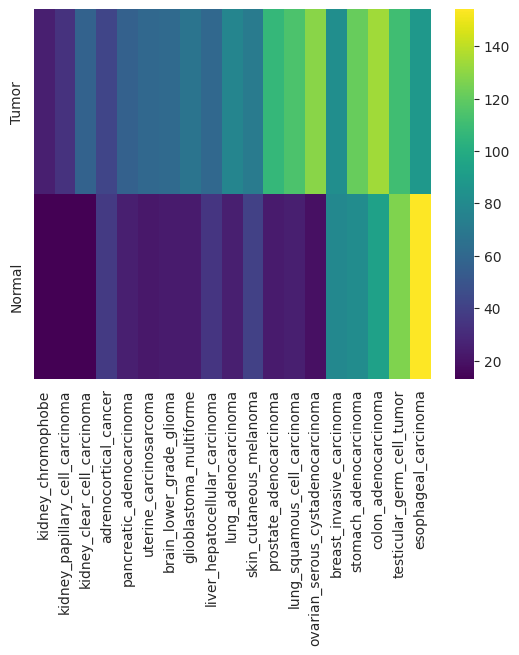

In [44]:
heatmap = df[["Tumor", "Normal"]].copy()
heatmap["Tumor"] = -heatmap["Tumor"]
heatmap = heatmap.T
sns.heatmap(heatmap, cmap="viridis", square=False)

In [9]:
# Sort values from lowest to highest 
#df.sort_values('car_sales_z', inplace=True) 
  
# Resets initial index in Dataframe to None 
#df.reset_index(inplace=True) 
  
# Draw plot 
plt.figure(figsize=(14, 10), dpi=80) 
  
# Plotting the horizontal lines 
plt.hlines(y=df.index, xmin=0, xmax=df.Normal, 
           color=df.colors, alpha=0.4, linewidth=5) 
  
# Decorations 
# Setting the labels of x-axis and y-axis 
plt.gca().set(ylabel='Quarter', xlabel='Sales') 
  
# Setting Date to y-axis 
plt.yticks(df.index, df.Date, fontsize=12) 
  
# Title of Bar Chart 
plt.title('Diverging Bars Chart Example', fontdict={ 
          'size': 20}) 
  
# Optional grid layout 
plt.grid(linestyle='--', alpha=0.5) 
  
# Displaying the Diverging Bar Chart 
plt.show() 


KeyboardInterrupt



# TCGA and GTEx, processing and saving 

In [104]:
# read raw data
adata=sc.read_h5ad("/projects/bioinformatics/DB/Xena/TCGA_GTEX/TCGA_GTEX.h5ad")

## Retrieve gene symbols
#dataset = Dataset(name='hsapiens_gene_ensembl',
#                  host='http://www.ensembl.org')
#
#annot = dataset.query(
#    attributes=['ensembl_gene_id', 'external_gene_name'],
#    filters={
#        'biotype': 'protein_coding',
#        'mane_select': True,
#        'chromosome_name': list(range(1,23)) + ["X", "Y"],
#    }
#).set_index("Gene stable ID", inplace=False, drop=False)

# retrieve gene symbol of protein coding genes
annot = pd.read_csv("~/resources/biomart/ensembl_to_symbol_filtered.csv.gz", index_col="Gene stable ID")

# remove ensembl version
adata.var["ensembl"] = adata.var_names.str.replace(r"\..*","", regex=True)

# set index to ensembl
adata.var_names = adata.var["ensembl"].values

# subset to genes in biomart
adata = adata[:, adata.var_names.isin(annot.index)]

# add gene symbols
adata.var["symbol"] = annot["Gene name"]

# remove genes with missing symbol
adata = adata[:, ~adata.var.symbol.isna()]

# set index to gene symbol
adata.var_names = adata.var.symbol.values

# subset to primary tumor and healty patients
adata = adata[~adata.obs.X_primary_site.isna()]
adata = adata[adata.obs.X_sample_type.isin(["Primary Tumor", "Normal Tissue"])]

# some Testicular Germ Cell Tumor are missing the gender
adata.obs.loc[adata.obs["primary_disease_or_tissue"] == "Testicular Germ Cell Tumor", "X_gender"] = "Male"

#drop samples with missing metadata
adata = adata[~(adata.obs.isna().sum(axis=1) > 0), :]

In [2]:
adata

NameError: name 'adata' is not defined

In [105]:
# Set adata.X to raw counts
adata.X = adata.layers["raw_counts"].todense().copy().astype(int)

In [6]:
adata.shape

(16583, 19013)

In [106]:
rename = {
    "X_study": "study",
    "X_gender": "gender",
    "X_sample_type": "type",
    "X_primary_site": "tissue",
    "primary-disease-or-tissue": "condition",
    "primary_disease_or_tissue": "condition"
}

adata.obs.rename(columns=rename, inplace=True)
adata.obs.drop(columns="detailed_category", inplace=True)
adata.obs.condition.value_counts()

condition
Breast Invasive Carcinoma              1091
Kidney Clear Cell Carcinoma             530
Head & Neck Squamous Cell Carcinoma     518
Lung Adenocarcinoma                     513
Brain Lower Grade Glioma                508
                                       ... 
Kidney - Cortex                          28
Bladder                                   9
Cervix - Ectocervix                       6
Fallopian Tube                            5
Cervix - Endocervix                       4
Name: count, Length: 83, dtype: int64

In [8]:
# only keep genes with counts > 15 in al least 75% of samples (suggested by WGCNA on RNAseq FAQ)

def filter_genes(adata, min_counts=15, fraction=0.75):
    """
    Filter genes based on count data in adata.X matrix.

    Parameters:
    - adata: AnnData object
    - min_counts: Minimum count threshold
    - max_fraction: Minimum fraction of samples where a gene should have counts above min_counts

    Returns:
    - Filtered AnnData object
    """
    
    # Check which combinations gene and sample are above min_counts
    is_above_thr = adata.X >= min_counts
    
    # For each gene calculate fraction of samples where gene has counts above min_counts
    fraction_per_gene = np.sum(is_above_thr, axis=0) / adata.shape[0] 
    
    # Subset to only genes that have enough counts in a big enough fraction of samples
    return adata[:, fraction_per_gene > fraction]

adata = filter_genes(adata, min_counts=15, fraction=0.75)

In [9]:
adata.shape

(16583, 13266)

In [23]:
adata.X = np.matrix(adata.X, dtype=int)

In [14]:
n_cpus = 26 # TODO: MAKE THIS A PARAMETER!!!!

inference = DefaultInference(n_cpus=n_cpus)

dds = DeseqDataSet(
    #adata = adata,
    counts=pd.DataFrame(data=adata.X,  index=adata.obs_names, columns=adata.var_names),
    metadata=adata.obs,                
    design_factors=["condition"],  # compare samples based on the "condition"
    refit_cooks=True,
    inference=inference,
    n_cpus = n_cpus
)

In [ ]:
dds.deseq2()

In [ ]:
dds.vst()

In [ ]:
# Store vst_counts to adata
# save dds object?

In [43]:
# write to disk
adata.write("/projects/bioinformatics/DB/Xena/TCGA_GTEX/tcga_gtex_clean.h5ad", compression="gzip")

In [44]:
# Divide according to tissue and condition

parent_dir = "/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/"

if not os.path.exists(parent_dir):
        os.makedirs(parent_dir)

for tissue in adata.obs.X_primary_site.unique():
    
    print(tissue)
    
    # Path 
    tissue_path = os.path.join(parent_dir, tissue) 

    if not os.path.isdir(tissue_path):
        os.mkdir(tissue_path) 
        print(f"Creating directory: {tissue_path}")
        
    bdata = adata[adata.obs.X_primary_site == tissue]
    
    # highly variable
    variances = np.var(bdata.layers["log_tpm_norm"], axis=0)
    bdata.var["var_in_tissue"] = variances

    # set adata.X to log2(TPM + 0.001)
    bdata.X = bdata.layers["log_tpm_norm"].copy()

    # Sort by descending variance
    bdata = bdata[:, bdata.var.var_all_tissues.sort_values(ascending=False).index]
    
    mads = median_abs_deviation(bdata.layers["log_tpm_norm"], axis=0)
    bdata.var["MAD"] = mads
    bdata.var["top_50pct_variable_in_tissue"] = (bdata.var["MAD"] > np.median(bdata.var["MAD"]))
        
    for condition in ["both", "normal", "tumor"]:
        print(4*" " + condition)
        condition_path = os.path.join(tissue_path, condition)
        if not os.path.isdir(condition_path):
            os.mkdir(condition_path) 
            print(f"Creating directory: {condition_path}")
        
        if condition == "both":
            cdata = bdata
            
            filename = os.path.join(tissue_path, tissue)
            filename += ".h5ad"
            print(8*" "+f"Writing file: {filename}")
            cdata.write(filename, compression="gzip")
            
        else:
            if condition == "normal":
                cdata = bdata[bdata.obs.X_sample_type == "Normal Tissue"]

            elif condition == "tumor":
                cdata = bdata[bdata.obs.X_sample_type == "Primary Tumor"]

            for category in cdata.obs.detailed_category.unique():
                print(8*" " + category)
                category_path = os.path.join(condition_path, category)
                if not os.path.isdir(category_path):
                    os.mkdir(category_path)
                    print(8*" "+f"Creating directory: {category_path}")
                ddata = cdata[cdata.obs.detailed_category == category]
                filename = os.path.join(category_path, category)
                filename += ".h5ad"
                print(8*" "+f"Writing file: {filename}")
                ddata.write(filename, compression="gzip")
            
        
    print()

Adipose Tissue
    normal
        Adipose - Subcutaneous
        Writing file: /projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/Adipose Tissue/normal/Adipose - Subcutaneous/Adipose - Subcutaneous.h5ad
        Adipose - Visceral (Omentum)
        Writing file: /projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/Adipose Tissue/normal/Adipose - Visceral (Omentum)/Adipose - Visceral (Omentum).h5ad
    tumor

Muscle
    normal
        Muscle - Skeletal
        Writing file: /projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/Muscle/normal/Muscle - Skeletal/Muscle - Skeletal.h5ad
    tumor

Blood Vessel
    normal
        Artery - Tibial
        Writing file: /projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/Blood Vessel/normal/Artery - Tibial/Artery - Tibial.h5ad
        Artery - Coronary
        Writing file: /projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/Blood Vessel/normal/Artery - Co

In [3]:
import pickle as pkl

In [4]:
path = "/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/Pancreas/normal/Pancreas/deseq2/Pancreas.pkl"

with open(path, "rb") as f:
    dds = pkl.load(f)

In [38]:
pancreas_dir = "/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/pancreas/"

In [41]:
adata = sc.read_h5ad(os.path.join(pancreas_dir, "normal/pancreas/pancreas.h5ad"))

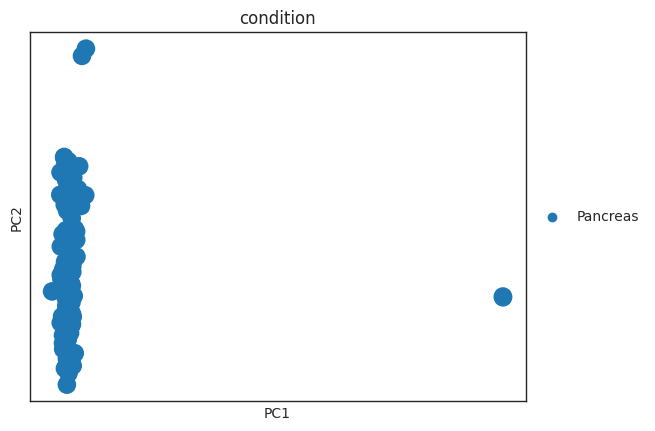

In [43]:
sc.tl.pca(adata)
sc.pl.pca(adata, color="condition")

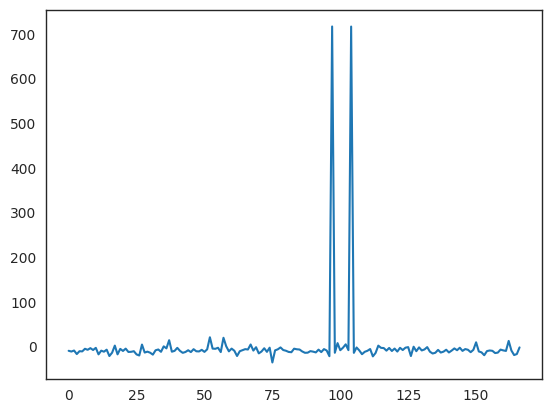

In [44]:
plt.plot(adata.obsm["X_pca"][:,0])

In [2]:
adata=sc.read_h5ad("/projects/bioinformatics/DB/Xena/TCGA_GTEX/TCGA_GTEX.h5ad")

adata.X = adata.layers["raw_counts"]

# subset to primary tumor and healty patients
adata = adata[~adata.obs.X_primary_site.isna()]
adata = adata[adata.obs.X_sample_type.isin(["Primary Tumor", "Normal Tissue"])]

rename = {
    "X_study": "study",
    "X_gender": "gender",
    "X_sample_type": "type",
    "X_primary_site": "tissue",
    "primary-disease-or-tissue": "condition",
    "primary_disease_or_tissue": "condition"
}

adata.obs.rename(columns=rename, inplace=True)
adata.obs.drop(columns="detailed_category", inplace=True)
adata.obs.condition.value_counts()

condition
Breast Invasive Carcinoma              1092
Kidney Clear Cell Carcinoma             530
Head & Neck Squamous Cell Carcinoma     518
Lung Adenocarcinoma                     513
Brain Lower Grade Glioma                509
                                       ... 
Kidney - Cortex                          28
Bladder                                   9
Cervix - Ectocervix                       6
Fallopian Tube                            5
Cervix - Endocervix                       4
Name: count, Length: 83, dtype: int64

In [3]:
adata.shape

(16589, 60498)

In [4]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [2]:
adata=sc.read_h5ad("/projects/bioinformatics/DB/Xena/TCGA_GTEX/TCGA_GTEX.h5ad")

In [6]:
adata.obs.columns

Index(['detailed_category', 'primary_disease_or_tissue', 'X_primary_site',
       'X_sample_type', 'X_gender', 'X_study'],
      dtype='object')

In [7]:
np.sort(list(adata.obs.X_primary_site.unique()))

array(['Adipose Tissue', 'Adrenal Gland', 'Adrenal gland', 'Bile duct',
       'Bladder', 'Blood', 'Blood Vessel', 'Brain', 'Breast', 'Cervix',
       'Cervix Uteri', 'Colon', 'Endometrium', 'Esophagus', 'Eye',
       'Fallopian Tube', 'Head and Neck region', 'Heart', 'Kidney',
       'Lining of body cavities', 'Liver', 'Lung', 'Lymphatic tissue',
       'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Paraganglia', 'Pituitary',
       'Prostate', 'Rectum', 'Salivary Gland', 'Skin', 'Small Intestine',
       'Soft tissue,Bone', 'Spleen', 'Stomach', 'Testis', 'Thymus',
       'Thyroid', 'Thyroid Gland', 'Uterus', 'Vagina', 'White blood cell',
       'nan'], dtype='<U32')

In [10]:
adata[adata.obs.X_primary_site == "Rectum"].obs

detailed_category primary_disease_or_tissue  \
TCGA-AF-2687-01  Rectum Adenocarcinoma     Rectum Adenocarcinoma   
TCGA-AF-2689-11  Rectum Adenocarcinoma     Rectum Adenocarcinoma   
TCGA-AF-2690-01  Rectum Adenocarcinoma     Rectum Adenocarcinoma   
TCGA-AF-2691-11  Rectum Adenocarcinoma     Rectum Adenocarcinoma   
TCGA-AF-2692-11  Rectum Adenocarcinoma     Rectum Adenocarcinoma   
...                                ...                       ...   
TCGA-G5-6233-01  Rectum Adenocarcinoma     Rectum Adenocarcinoma   
TCGA-G5-6235-01  Rectum Adenocarcinoma     Rectum Adenocarcinoma   
TCGA-G5-6572-01  Rectum Adenocarcinoma     Rectum Adenocarcinoma   
TCGA-G5-6572-02  Rectum Adenocarcinoma     Rectum Adenocarcinoma   
TCGA-G5-6641-01  Rectum Adenocarcinoma     Rectum Adenocarcinoma   

                X_primary_site        X_sample_type X_gender X_study  
TCGA-AF-2687-01         Rectum        Primary Tumor     Male    TCGA  
TCGA-AF-2689-11         Rectum  Solid Tissue Normal   Female    TCGA  
TCGA-AF-2690-01         Rectum        Primary Tumor   Female    TCGA  
TCGA-AF-2691-11         Rectum  Solid Tissue Normal   Female    TCGA  
TCGA-AF-2692-11         Rectum  Solid Tissue Normal   Female    TCGA  
...                        ...                  ...      ...     ...  
TCGA-G5-6233-01         Rectum        Primary Tumor     Male    TCGA  
TCGA-G5-6235-01         Rectum        Primary Tumor     Male    TCGA  
TCGA-G5-6572-01         Rectum        Primary Tumor     Male    TCGA  
TCGA-G5-6572-02         Rectum      Recurrent Tumor     Male    TCGA  
TCGA-G5-6641-01         Rectum        Primary Tumor     Male    TCGA  

[103 rows x 6 columns]

In [10]:
adata.X = np.matrix(adata.layers["raw_counts"].todense(), dtype=int)

In [11]:
adata.X

matrix([[ 0,  0,  4, ...,  3,  0,  0],
        [ 0,  0, 18, ...,  1,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 16,  0,  0],
        [ 0,  0,  0, ...,  7,  0,  0],
        [ 0,  0,  1, ...,  1,  0,  0]])

In [2]:
adata=sc.read_h5ad("/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/rectum/normal/rectum.h5ad")

In [3]:
adata.shape

(0, 0)

In [5]:
QCs = [
    'n_genes_by_counts',
    'total_counts',
    'pct_counts_in_top_100_genes',
]

In [6]:
adata.obs["th_outlier"] = False

# n_genes_by_counts:
#
# min 20000
# max 40000

adata.obs["th_outlier"] = np.where(
    (adata.obs["n_genes_by_counts"] < 20000) | (adata.obs["n_genes_by_counts"] > 40000),
    True,
    adata.obs["th_outlier"]
)
                            
# total_counts
#
# min 10000000 (1e7)
# max 120000000 (1.2e8)

adata.obs["th_outlier"] = np.where(
    (adata.obs["total_counts"] < 1e7) | (adata.obs["total_counts"] > 1.2e8),
    True,
    adata.obs["th_outlier"]
)

# pct_counts_in_top_100_genes
# max 85

adata.obs["th_outlier"] = np.where(
    (adata.obs["pct_counts_in_top_100_genes"] > 90),
    True,
    adata.obs["th_outlier"]
)

In [7]:
adata.obs["th_outlier"].value_counts()

th_outlier
False    16424
True       165
Name: count, dtype: int64

In [8]:
def is_outlier(adata, metric: str, nmads: int):
    """
    identify outliers based on a MAD threshold

    params:
        adata: AnnData object
        metric: adata.obs column to use as metric
        nmads: number of MADs to use as threshold
    """
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * (M - M.mean()).abs().mean()) | \
              (M > np.median(M) + nmads * (M - M.mean()).abs().mean())
    return outlier

def QC_filter(adata, nmad=3, batch_key="sample", subset=False, verbose=False):
    '''
    Filters low-quality samples in single-cell RNA-seq data based on QC metrics.

    :param adata: Anndata object representing the unfiltered data with QC metrics.
    :param nmad: Number of median absolute deviations (MADs) used for filtering "log1p_total_counts", "log1p_n_genes_by_counts", and "pct_counts_in_top_20_genes".
    :param batch_key: Key in the observation metadata specifying the batch/sample information.
    :param subset: If True, subsets the Anndata object to exclude the identified outliers.
    :param verbose: If True, prints additional information during the filtering process.
    '''

    adata.obs["qc_outlier"] = False
    adata.obs["outlier"] = False
    
    for batch_id in adata.obs[batch_key].unique():
        # Subset to batch
        batch_indices = adata.obs[batch_key] == batch_id
        batch = adata[batch_indices].copy()
        
        if verbose:
            print(f"Batch: {batch_id}")
            
        if nmad > 0:
            if verbose:
                print(f"Thresholding at {nmad} MADs: log1p_total_counts, log1p_n_genes_by_counts, pct_counts_in_top_20_genes")
            qc_outliers = (
                is_outlier(batch, "log1p_total_counts", nmad)
                | is_outlier(batch, "log1p_n_genes_by_counts", nmad)
                | is_outlier(batch, "pct_counts_in_top_100_genes", nmad)
            )
            adata.obs.loc[batch_indices, "qc_outlier"] = qc_outliers
        
        if verbose:
            print(adata.obs.qc_outlier.value_counts())
            print()

    adata.obs["outlier"] = adata.obs["qc_outlier"]
    
    print(f"Total number of samples: {adata.n_obs}")
    print(f"Outliers: {sum(list(adata.obs['outlier']))}")
    
    if subset:
        adata = adata[~adata.obs.outlier].copy()
        print(f"Number of samples after filtering: {adata.n_obs}")
    
    return adata


adata = QC_filter(adata, nmad=5, batch_key="condition", subset=False, verbose=False)

Total number of samples: 16589
Outliers: 1266


In [9]:
adata = adata[~(adata.obs["th_outlier"] | adata.obs["qc_outlier"])]

sc.pp.calculate_qc_metrics(adata, inplace=True)

In [10]:
adata.obs["n_genes_by_counts"].max()

39643

n_genes_by_counts


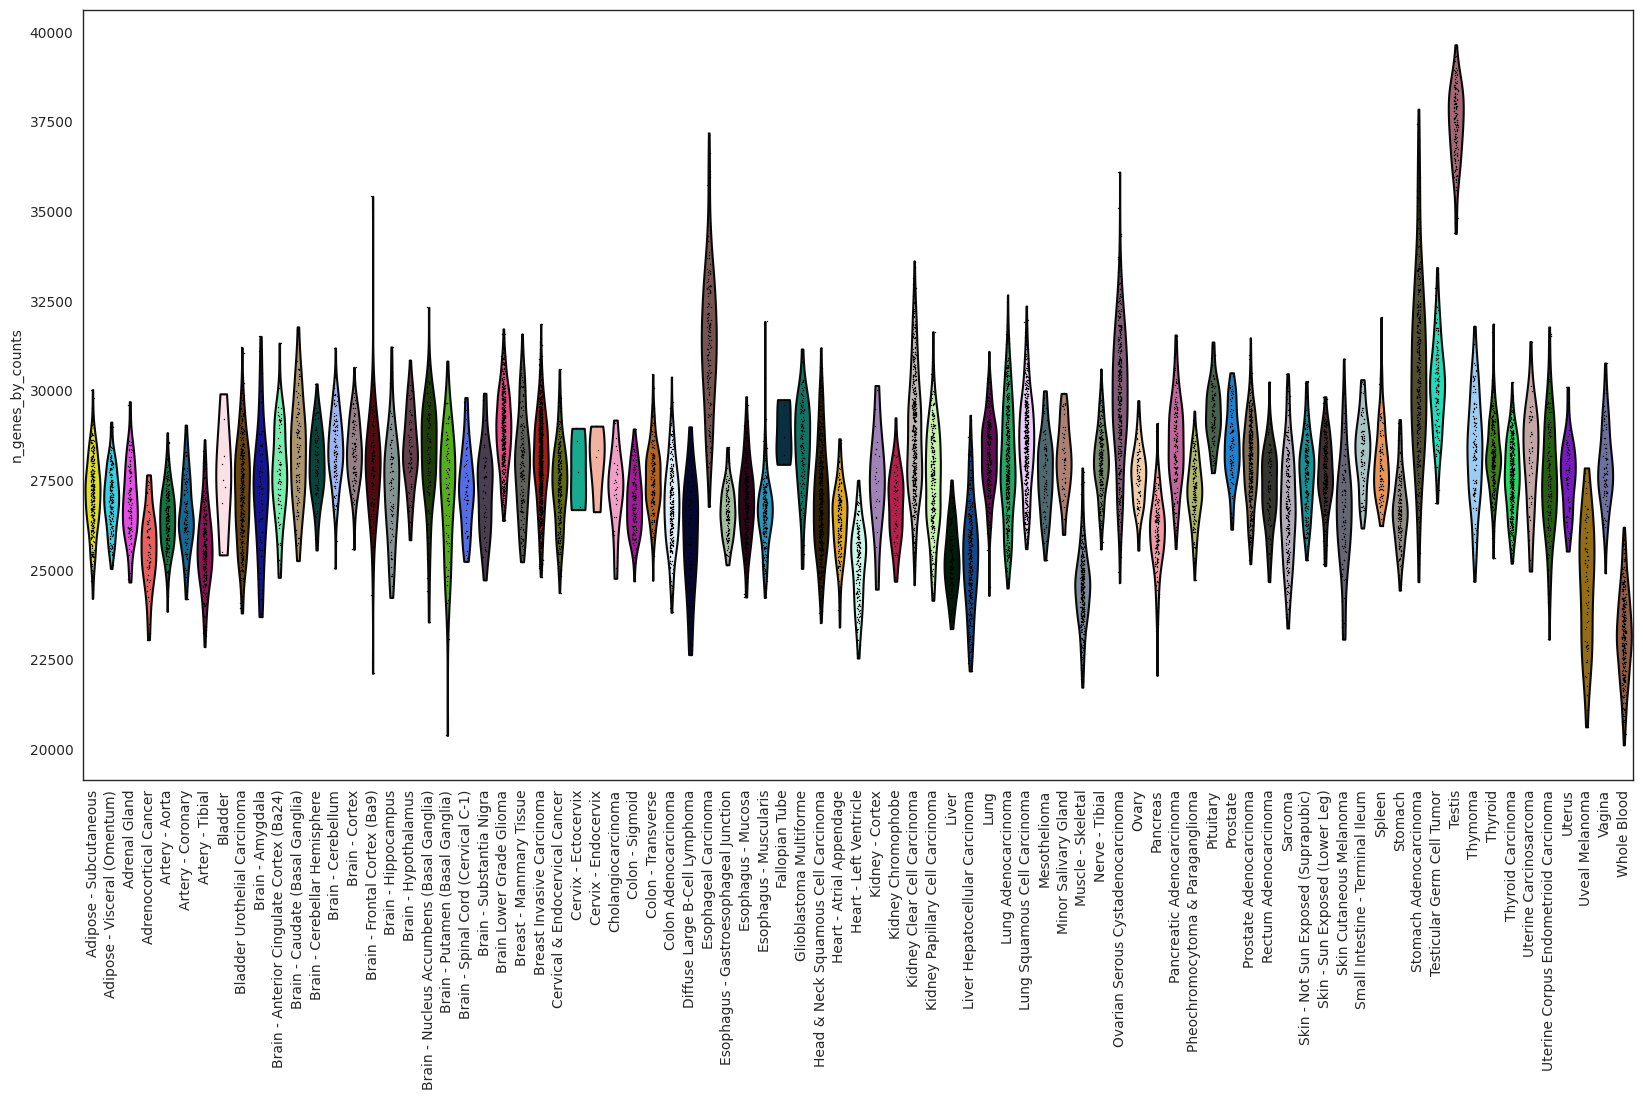

total_counts


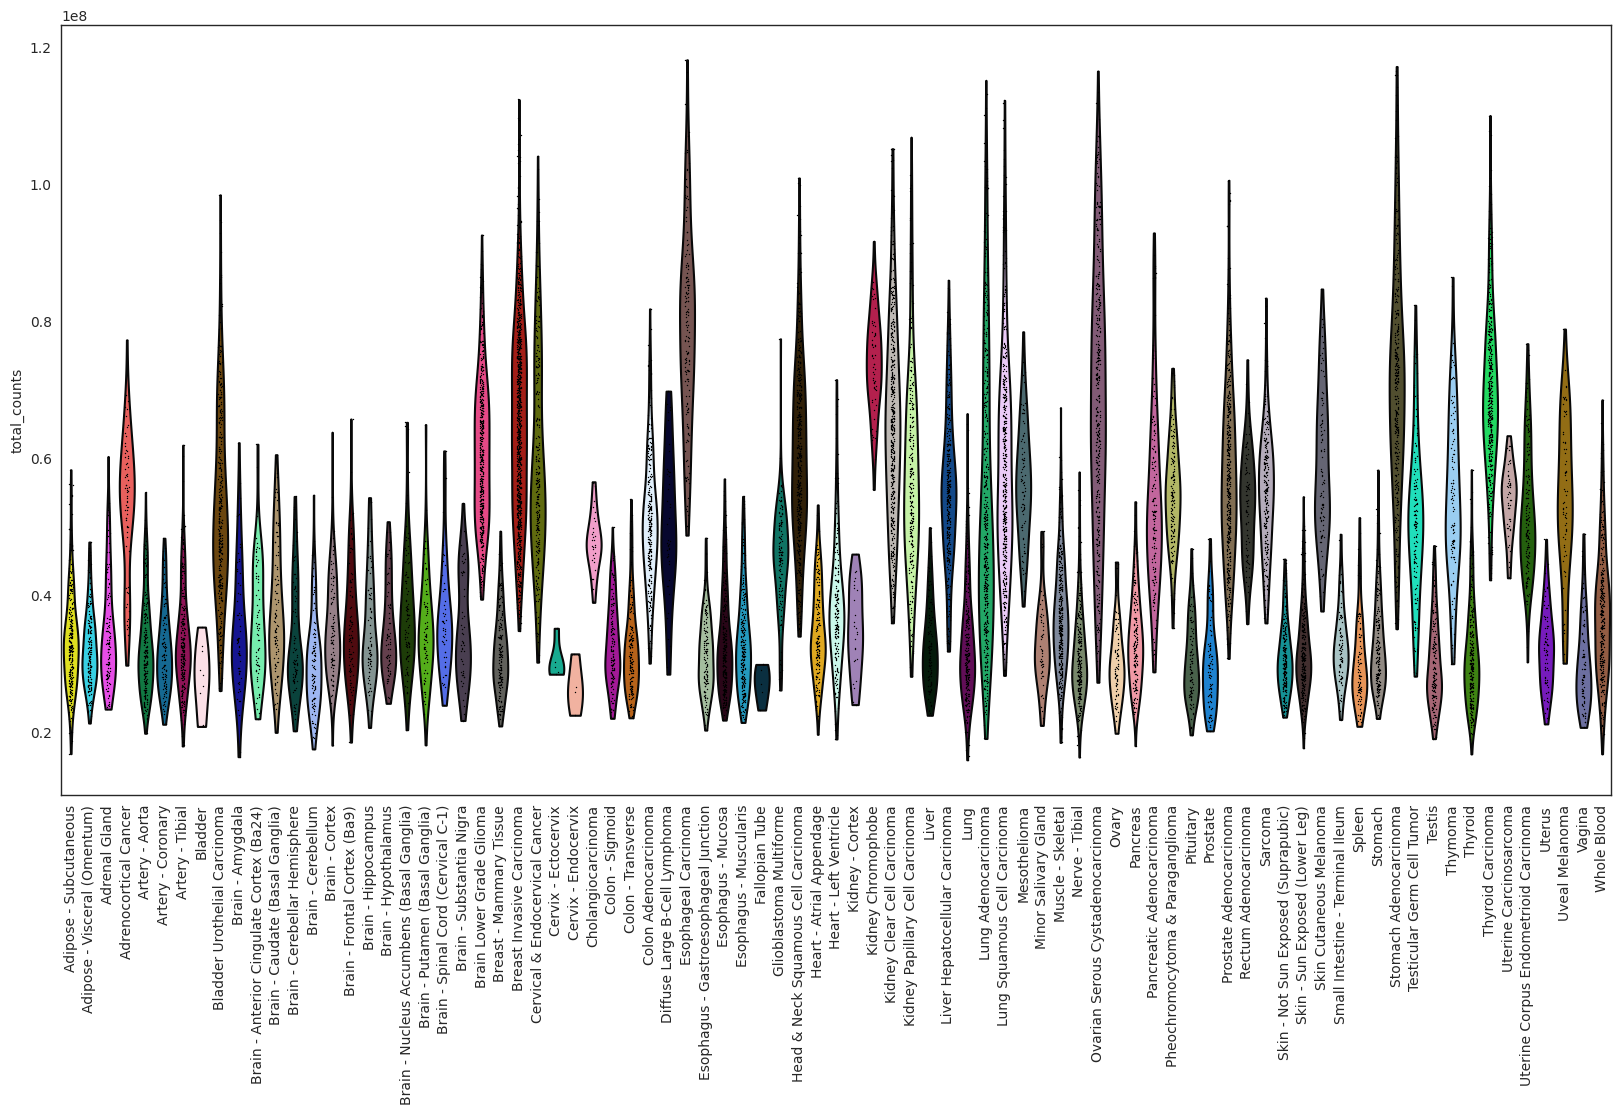

pct_counts_in_top_100_genes


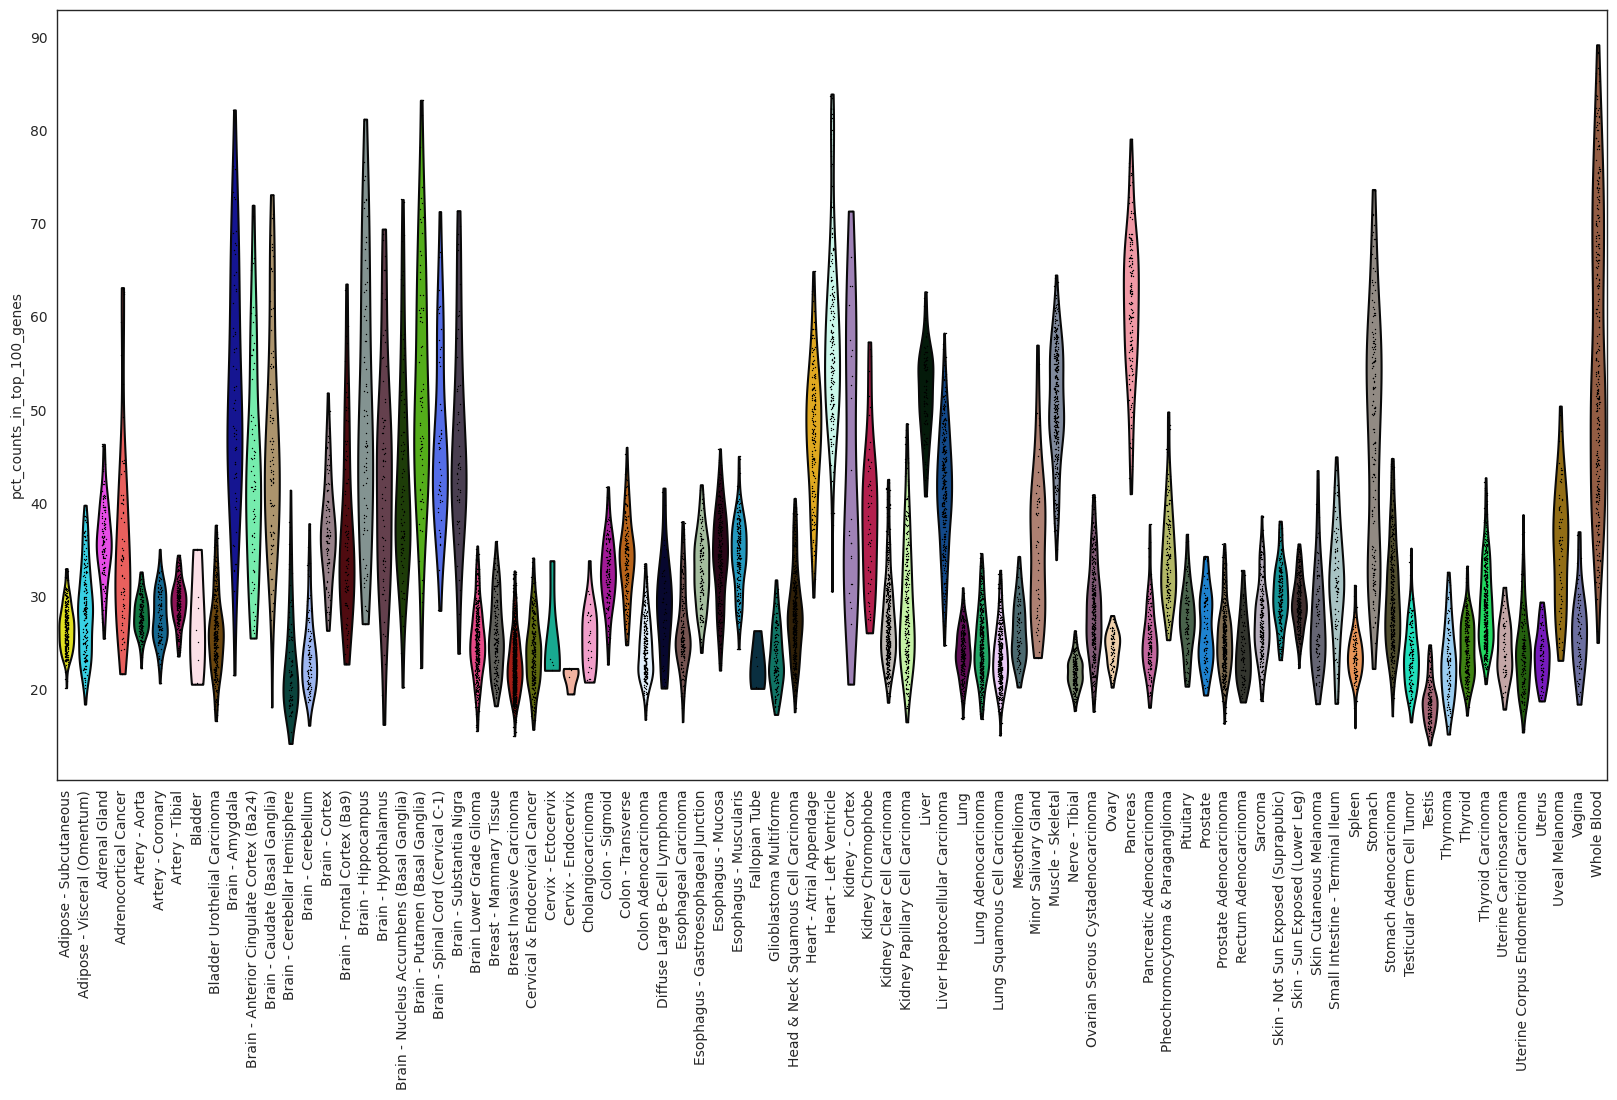

In [12]:
for QC in QCs:
    print(QC)
    fig, ax = plt.subplots(figsize=(20,10))
    sc.pl.violin(adata, QC, groupby="condition", rotation=90, ax=ax)
    plt.show()

matrix([[0, 0, 4, ..., 3, 0, 0]])

# Explore WGCNA results

In [66]:
# Let's use Normal Pancreas VS Pancreatic Adenocarcinoma as an example
pancreas_dir = "/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/pancreas/"

path_normal = os.path.join(pancreas_dir, "normal/WGCNA_pancreas.p")
WGCNA_n = PyWGCNA.readWGCNA(path_normal)

path_tumor = os.path.join(pancreas_dir, "tumor/pancreatic_adenocarcinoma/WGCNA_pancreatic_adenocarcinoma.p")
WGCNA_t = PyWGCNA.readWGCNA(path_tumor)

KeyboardInterrupt: 

In [69]:
liver_dir = "/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/liver/"

path_normal = os.path.join(liver_dir, "normal/WGCNA_liver.p")
WGCNA_n = PyWGCNA.readWGCNA(path_normal)

path_tumor = os.path.join(liver_dir, "tumor/liver_hepatocellular_carcinoma/WGCNA_liver_hepatocellular_carcinoma.p")
WGCNA_t = PyWGCNA.readWGCNA(path_tumor)

Reading WGCNA_liver WGCNA done!
Reading WGCNA_liver_hepatocellular_carcinoma WGCNA done!


In [8]:
tissue = "esophagus"
tissue_dir = os.path.join("/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal", tissue)

path_normal = os.path.join(tissue_dir, "normal/WGCNA_" + tissue + ".p")
WGCNA_n = PyWGCNA.readWGCNA(path_normal)

tumor = "esophageal_carcinoma"
path_tumor = os.path.join(tissue_dir, "tumor/" + tumor + "/WGCNA_" + tumor + ".p")
WGCNA_t = PyWGCNA.readWGCNA(path_tumor)

KeyboardInterrupt: 

Mean value of TOM:
All genes:    0.00034
LR pairs:    0.00064


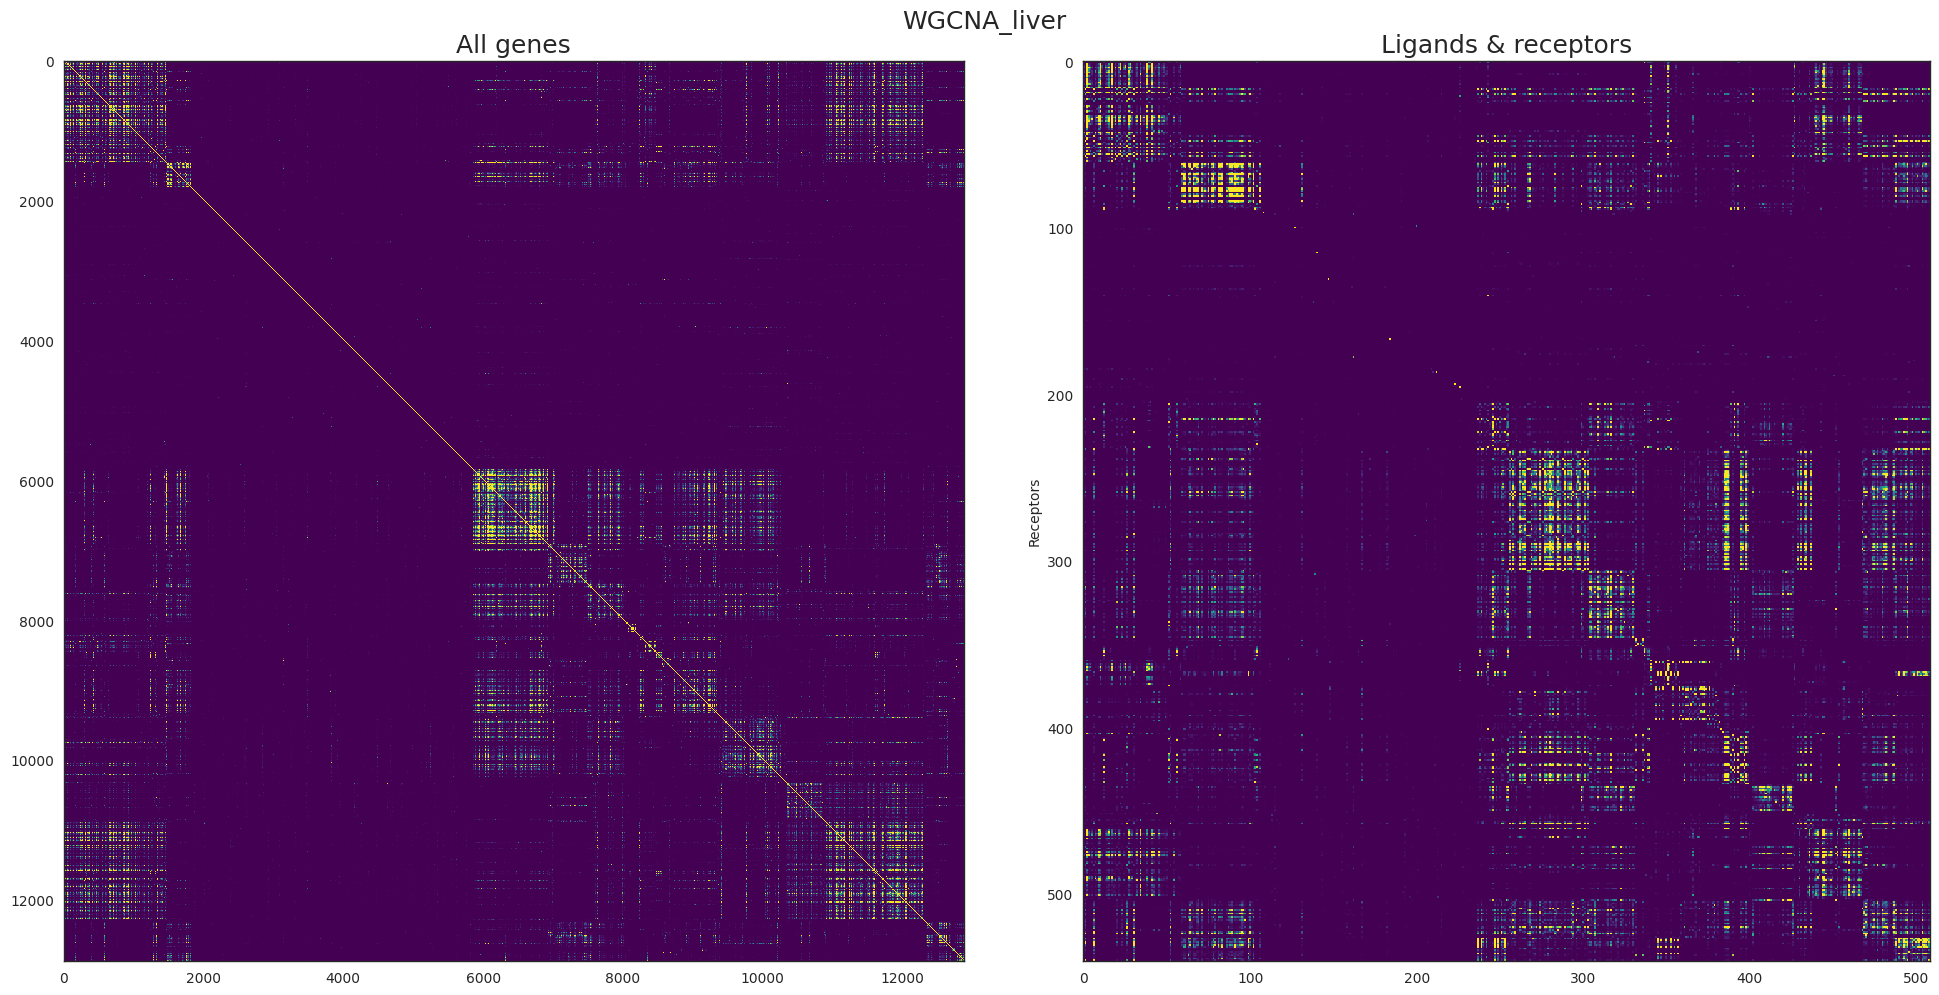

Mean value of TOM:
All genes:    0.00178
LR pairs:    0.00868


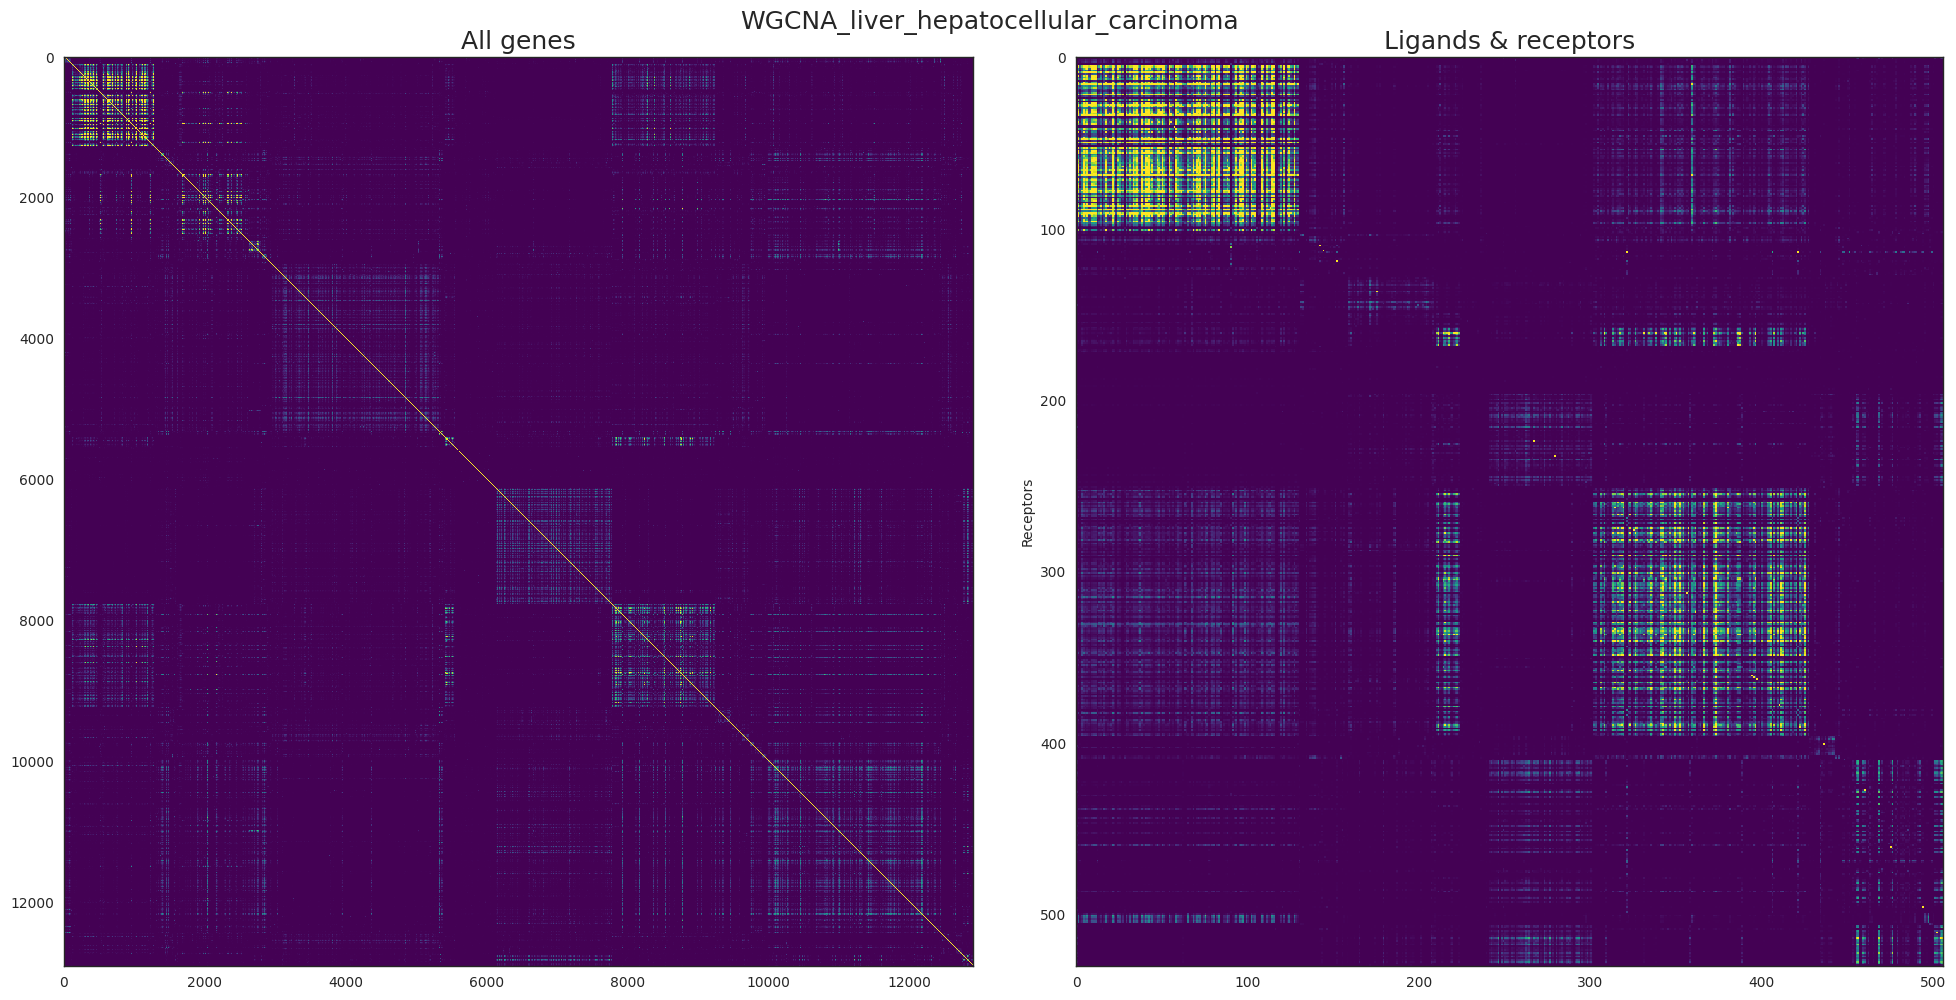

In [70]:
resource = pd.read_csv("/projects/bioinformatics/DB/CellCellCommunication/LianaResources/consensus.csv")
#resource = pd.read_csv("/projects/bioinformatics/DB/CellCellCommunication/LianaResources/cellphonedb.csv")
lr_genes = set(resource["ligand"]).union(resource["receptor"])

fs = 18
cmap='viridis'

for WGCNA in WGCNA_n, WGCNA_t:
    
    ordered = WGCNA.datExpr.var.sort_values(by="moduleLabels").index
    tom_all = WGCNA.TOM.loc[ordered, ordered]
    
    ligands_ordered = ordered[ordered.isin(resource["ligand"])]
    receptors_ordered = ordered[ordered.isin(resource["receptor"])]
    tom_lr = WGCNA.TOM.loc[ligands_ordered, receptors_ordered]
    
    print("Mean value of TOM:")
    mean_all = np.mean(tom_all.values[np.triu_indices(n=tom_all.shape[0], k=1)])
    mean_lr = np.mean(tom_lr.values[np.triu_indices(n=tom_lr.shape[0], k=1, m=tom_lr.shape[1])])

    print("All genes:    {:.5f}".format(mean_all))
    print("LR pairs:    {:.5f}".format(mean_lr))
    
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    
    fig.suptitle(WGCNA.name, fontsize=fs)
    
    vmax = np.percentile(tom_lr, 99)
    vmin = 0
    cax = ax[0].imshow(tom_all, cmap=cmap, interpolation='none', vmin=vmin, vmax=vmax)
    ax[0].set_title("All genes", fontsize=fs)
    
    cax = ax[1].imshow(tom_lr, cmap=cmap, interpolation='none', vmin=vmin, vmax=vmax)
    ax[1].set_title("Ligands & receptors", fontsize=fs)
    ax[1].set_ylabel("Ligands")
    ax[1].set_ylabel("Receptors")
    
    plt.tight_layout()    
    plt.show()

In [71]:
# flatten TOM matrix
#all_pairs = pd.DataFrame(WGCNA.TOM.stack(dropna=True, sort=True), columns=["TOM"])
all_pairs = pd.DataFrame(WGCNA.TOM.stack(dropna=True, sort=True), columns=["TOM"])

allgenes = set(all_pairs.index.get_level_values(0))

all_pairs["LR Pair"] = False

# Identify rows where both ligand and receptor are present in allgenes
valid_rows = resource[(resource['ligand'].isin(allgenes)) & (resource['receptor'].isin(allgenes))]

# Set "LR Pair" to True for the valid rows using loc and the index
all_pairs.loc[list(zip(valid_rows['ligand'], valid_rows['receptor'])), "LR Pair"] = True

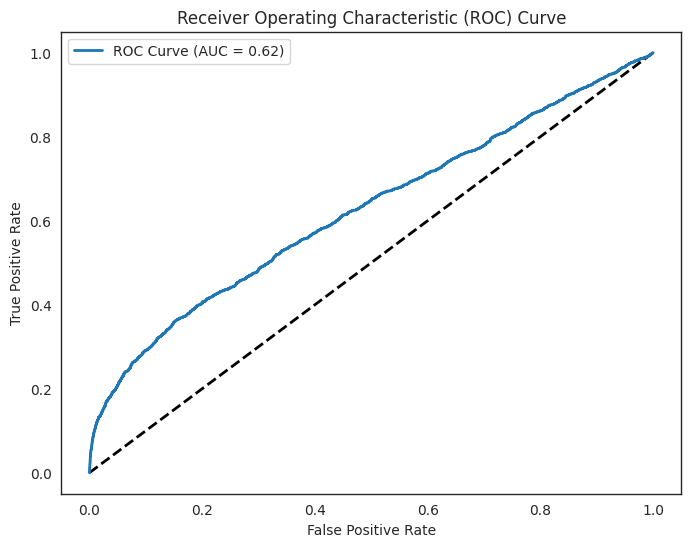

In [74]:
# Assuming df is your dataframe with columns "TOM" and "LR Pair"
# X is the feature (TOM) and y is the target variable (LR Pair)
X = all_pairs['TOM']
y = all_pairs['LR Pair']

# Calculate ROC curve for different thresholds
fpr, tpr, thresholds = roc_curve(y, X)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y, X)

# Plot ROC curve and include AUC in the legend
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='k', linestyle='--', lw=2)
plt.plot(fpr, tpr, color='C0', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [45]:
tom_all = tom_all.values
tom_all_flat = tom_all[np.triu_indices(tom_all.shape[0], k=1)]

tom_lr  = tom_lr.loc[tom_lr.index.isin(resource["ligand"]), tom_lr.columns.isin(resource["receptor"])]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [46]:
new_tom_lr = resource.copy()
new_tom_lr['tom_lr_values'] = np.nan

for index, row in new_tom_lr.iterrows():
    ligand = row['ligand']
    receptor = row['receptor']
    
    if (ligand in tom_lr.index) & (receptor in tom_lr.columns):

        # Access the corresponding value from tom_lr
        value = tom_lr.loc[ligand, receptor]

        # Assign the value to the 'tom_lr_values' column in new_tom_lr
        new_tom_lr.at[index, 'tom_lr_values'] = value
        


In [50]:
np.median(new_tom_lr.dropna()["tom_lr_values"])

0.0013369267686109748

In [51]:
np.median(tom_all_flat)

0.0005624204163595901

In [43]:
np.mean(tom_lr_flat)

nan

In [41]:
tom_lr_flat = new_tom_lr["tom_lr_values"].values

In [44]:
tom_lr_flat

array([0.00054969, 0.01410266, 0.00544349, ..., 0.03450438,        nan,
              nan])

In [204]:
sum(tom_lr_flat > 0.01)

443

In [13]:
import seaborn as sns

In [56]:
import matplotlib.pyplot as plt

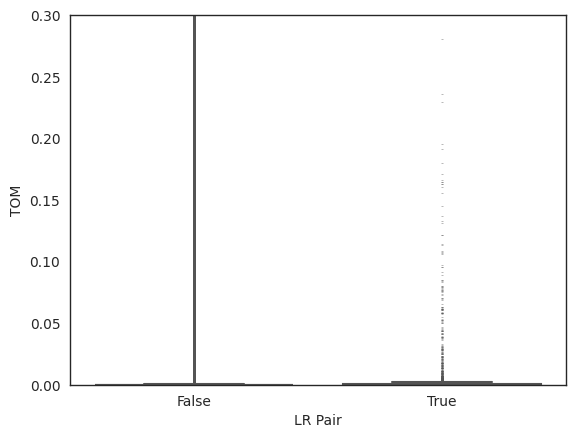

In [25]:
sns.boxplot(
    x='LR Pair',
    y='TOM',
    data=all_pairs,
    palette='muted',
    fliersize=0.1,
    #cut=0,
)

plt.ylim(0, 0.3)
plt.show()

In [31]:
import seaborn as sns

In [34]:
# Create separate DataFrames for tom_all and tom_lr
df_tom_all = pd.DataFrame({'Value': tom_all_flat, 'Matrix': 'tom_all'})
df_tom_lr = pd.DataFrame({'Value': tom_lr_flat, 'Matrix': 'tom_lr'})

# Concatenate the DataFrames vertically
data = pd.concat([df_tom_all, df_tom_lr], ignore_index=True)

# Create a violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Matrix',
    y='Value',
    data=data,
    palette='muted',
    #fliersize=0,
    #cut=0,
)

plt.ylim(0, 0.2)
plt.title('Topological Overlap Measure')
plt.show()

NameError: name 'tom_all_flat' is not defined

In [ ]:
# Exclude diagonal elements
np.fill_diagonal(tom_all, np.nan)
np.fill_diagonal(tom_lr, np.nan)

# Create separate DataFrames for tom_all and tom_lr
df_tom_all = pd.DataFrame(tom_all.flatten(), columns=['Value'])
df_tom_all['Matrix'] = 'tom_all'

df_tom_lr = pd.DataFrame(tom_lr.flatten(), columns=['Value'])
df_tom_lr['Matrix'] = 'tom_lr'

# Concatenate the DataFrames vertically
data = pd.concat([df_tom_all, df_tom_lr], ignore_index=True)

# Create a violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Matrix',
    y='Value',
    data=data,
    palette='muted',
    #fliersize=0,
    cut=0,
)
plt.title('Topological Overlap Measure')
plt.show()

In [34]:
toms = pd.DataFrame({
    "All genes": tom_all.values.flatten(),
})

toms["LR Pairs"] = np.nan
toms["LR Pairs"].iloc[:len(tom_lr.values.flatten())] = tom_lr.values.flatten()

In [ ]:
sns.violinplot(toms)

In [ ]:
sns.load_dataset("titanic").head()

In [79]:
import random

In [80]:
def generate_unique_random_pairs(k, N):
    if k > N * (N - 1) // 2:
        raise ValueError("Cannot generate more unique pairs than the total number of possible pairs.")

    pairs = set()

    while len(pairs) < k:
        pair = tuple(random.sample(range(N), 2))
        pairs.add(pair)

    return list(pairs)

def check_pairs(series, pairs):
    result = []

    for pair in pairs:
        index1, index2 = pair
        value1 = series.iloc[index1]
        value2 = series.iloc[index2]

        result.append(value1 == value2)

    return result

In [81]:
def calculate_observed_expected(WGCNA_object, k):
    N = len(WGCNA_object.datExpr.var)
    
    # Generate random pairs
    random_pairs = generate_unique_random_pairs(k, N)
    
    # Calculate observed values
    observed_result = check_pairs(WGCNA_object.datExpr.var.moduleColors, random_pairs)
    observed_result = pd.Series(observed_result)
    
    print("Observed:")
    print(observed_result.value_counts() / k)
    
    # Calculate expected values
    probs = WGCNA_object.datExpr.var.moduleColors.value_counts() / WGCNA_object.datExpr.var.shape[0]
    tot = 0
    for c1 in probs.index:
        tot += probs[c1] * (WGCNA_object.datExpr.var.moduleColors.value_counts()[c1] - 1) / (WGCNA_object.datExpr.var.shape[0] -1)
    
    print("Expected:")
    print(tot)

In [84]:
def expected_frac_same_module(WGCNA_object):
    N = len(WGCNA_object.datExpr.var)
    
    # Calculate expected values
    probs = WGCNA_object.datExpr.var.moduleColors.value_counts() / WGCNA_object.datExpr.var.shape[0]
    tot = 0
    for c1 in probs.index:
        tot += probs[c1] * (WGCNA_object.datExpr.var.moduleColors.value_counts()[c1] - 1) / (WGCNA_object.datExpr.var.shape[0] -1)
    
    return tot

In [97]:
cpdb_n = pd.read_csv(os.path.join(pancreas_dir, "normal/cellphonedb_interactions.csv"))
cpdb_t = pd.read_csv(os.path.join(pancreas_dir, "tumor/pancreatic_adenocarcinoma/cellphonedb_interactions.csv"))

In [99]:
exp_n = expected_frac_same_module(WGCNA_normal)*cpdb_n.shape[0]
exp_t = expected_frac_same_module(WGCNA_tumor)*cpdb_t.shape[0]

In [102]:
exp_t

33.15260412032569

In [100]:
df.loc["pancreatic_adenocarcinoma"]

Name            pancreatic_adenocarcinoma
Tumor                                 -56
Normal                                 25
Difference                            -31
Sum                                    81
RelativeDiff                        78.76
Name: pancreatic_adenocarcinoma, dtype: object

In [82]:
# Example usage:
k = 1e6  # Number of unique pairs
calculate_observed_expected(WGCNA_normal, k)

Observed:
False    0.938841
True     0.061159
Name: count, dtype: float64
Expected:
0.061459809206494236


In [83]:
# Example usage:
k = 1e6  # Number of unique pairs
calculate_observed_expected(WGCNA_tumor, k)

Observed:
False    0.90364
True     0.09636
Name: count, dtype: float64
Expected:
0.0963738491869933


In [28]:
WGCNA_normal.datExpr.shape

(167, 13428)

In [30]:
WGCNA_tumor.datExpr.shape

(178, 14635)

In [19]:
WGCNA_normal.datExpr.var.top_50pct_variable.value_counts()

top_50pct_variable
True     7789
False    7625
Name: count, dtype: int64

In [9]:
WGCNA_tumor.datExpr.var

ensembl  symbol     MAD  top_50pct_variable  \
RAB4B   ENSG00000167578   RAB4B  1.0569               False   
TIGAR   ENSG00000078237   TIGAR  1.3634               False   
RNF44   ENSG00000146083   RNF44  0.5941               False   
DNAH3   ENSG00000158486   DNAH3  3.0484                True   
RPL23A  ENSG00000198242  RPL23A  0.4619               False   
...                 ...     ...     ...                 ...   
KIF16B  ENSG00000089177  KIF16B  0.8554               False   
CYP4F2  ENSG00000186115  CYP4F2  1.5536                True   
TENM1   ENSG00000009694   TENM1  0.9653                True   
BATF3   ENSG00000123685   BATF3  1.5689                True   
PPP6R1  ENSG00000105063  PPP6R1  1.2035               False   

        top_50pct_variable_in_tissue dynamicColors moduleColors  moduleLabels  
RAB4B                           True       dimgrey      dimgrey             3  
TIGAR                           True     gainsboro    gainsboro             5  
RNF44                          False     gainsboro    gainsboro             5  
DNAH3                           True     indianred    indianred             6  
RPL23A                         False     gainsboro    gainsboro             5  
...                              ...           ...          ...           ...  
KIF16B                          True     gainsboro    gainsboro             5  
CYP4F2                          True     firebrick    firebrick             4  
TENM1                           True       darkred      darkred             2  
BATF3                           True     lightgrey    lightgrey             8  
PPP6R1                          True     gainsboro    gainsboro             5  

[16875 rows x 8 columns]

In [17]:
WGCNA_normal.datExpr.var.moduleColors.value_counts()

moduleColors
silver    7697
black      270
Name: count, dtype: int64

In [15]:
WGCNA_tumor.datExpr.var.moduleColors.value_counts()

moduleColors
darkgrey      2917
dimgrey       2152
gainsboro      976
black          568
white          518
salmon         404
lightcoral     221
firebrick      216
coral          190
silver         153
lightgrey      138
mistyrose      132
indianred      111
darkred         96
red             87
tomato          79
brown           62
darksalmon      56
Name: count, dtype: int64

In [29]:
comparison.jaccard_similarity.head(5)

Pancreas:gainsboro  Pancreas:dimgrey  Pancreas:lightgrey  \
Pancreas:gainsboro                 1.0               0.0                 0.0   
Pancreas:dimgrey                   0.0               1.0                 0.0   
Pancreas:lightgrey                 0.0               0.0                 1.0   
Pancreas:black                     0.0               0.0                 0.0   
Pancreas:rosybrown                 0.0               0.0                 0.0   

                    Pancreas:black  Pancreas:rosybrown  Pancreas:silver  \
Pancreas:gainsboro             0.0                 0.0              0.0   
Pancreas:dimgrey               0.0                 0.0              0.0   
Pancreas:lightgrey             0.0                 0.0              0.0   
Pancreas:black                 1.0                 0.0              0.0   
Pancreas:rosybrown             0.0                 1.0              0.0   

                    Pancreatic Adenocarcinoma:coral  \
Pancreas:gainsboro                         0.000000   
Pancreas:dimgrey                           0.131135   
Pancreas:lightgrey                         0.028143   
Pancreas:black                             0.011834   
Pancreas:rosybrown                         0.000000   

                    Pancreatic Adenocarcinoma:firebrick  \
Pancreas:gainsboro                             0.007051   
Pancreas:dimgrey                               0.427354   
Pancreas:lightgrey                             0.140286   
Pancreas:black                                 0.021617   
Pancreas:rosybrown                             0.000084   

                    Pancreatic Adenocarcinoma:darkgrey  \
Pancreas:gainsboro                            0.006301   
Pancreas:dimgrey                              0.131437   
Pancreas:lightgrey                            0.138881   
Pancreas:black                                0.020751   
Pancreas:rosybrown                            0.008937   

                    Pancreatic Adenocarcinoma:lightcoral  \
Pancreas:gainsboro                              0.123548   
Pancreas:dimgrey                                0.090392   
Pancreas:lightgrey                              0.087693   
Pancreas:black                                  0.019158   
Pancreas:rosybrown                              0.003655   

                    Pancreatic Adenocarcinoma:orangered  \
Pancreas:gainsboro                             0.001266   
Pancreas:dimgrey                               0.001656   
Pancreas:lightgrey                             0.013782   
Pancreas:black                                 0.004762   
Pancreas:rosybrown                             0.005831   

                    Pancreatic Adenocarcinoma:maroon  \
Pancreas:gainsboro                          0.000000   
Pancreas:dimgrey                            0.037268   
Pancreas:lightgrey                          0.017055   
Pancreas:black                              0.017286   
Pancreas:rosybrown                          0.000000   

                    Pancreatic Adenocarcinoma:sienna  \
Pancreas:gainsboro                          0.003268   
Pancreas:dimgrey                            0.000000   
Pancreas:lightgrey                          0.003217   
Pancreas:black                              0.001502   
Pancreas:rosybrown                          0.000000   

                    Pancreatic Adenocarcinoma:darksalmon  \
Pancreas:gainsboro                              0.003812   
Pancreas:dimgrey                                0.007726   
Pancreas:lightgrey                              0.020820   
Pancreas:black                                  0.004768   
Pancreas:rosybrown                              0.036145   

                    Pancreatic Adenocarcinoma:tomato  \
Pancreas:gainsboro                          0.004902   
Pancreas:dimgrey                            0.000000   
Pancreas:lightgrey                          0.004508   
Pancreas:black                              0.000000   
Pancreas:rosybrown    

In [10]:
#LIVER
liver_dir = "/projects/bioinformatics/DB/Xena/TCGA_GTEX/by_tissue_primary_vs_normal/Liver/"

path_normal = os.path.join(liver_dir, "normal/Liver/Liver.p")
WGCNA_normal = PyWGCNA.readWGCNA(path_normal)

path_tumor = os.path.join(liver_dir, "tumor/Liver Hepatocellular Carcinoma/Liver Hepatocellular Carcinoma.p")
WGCNA_tumor = PyWGCNA.readWGCNA(path_tumor)

Reading Liver WGCNA done!
Reading Liver Hepatocellular Carcinoma WGCNA done!


In [10]:
WGCNA_normal.datExpr.var.moduleColors.unique()

array(['lightgrey', 'darkgrey', 'black', 'gainsboro'], dtype=object)

In [17]:
WGCNA_tumor.datExpr.var

ensembl   symbol       MAD  top_50pct_variable  \
TIGAR    ENSG00000078237    TIGAR  0.755400               False   
DNAH3    ENSG00000158486    DNAH3  3.459384                True   
CALB2    ENSG00000172137    CALB2  1.898200                True   
DACH1    ENSG00000276644    DACH1  1.385700                True   
FMO2     ENSG00000094963     FMO2  1.434100                True   
...                  ...      ...       ...                 ...   
SLCO4C1  ENSG00000173930  SLCO4C1  2.439900                True   
KIF16B   ENSG00000089177   KIF16B  0.617700               False   
CYP4F2   ENSG00000186115   CYP4F2  0.974900                True   
TENM1    ENSG00000009694    TENM1  2.494200                True   
BATF3    ENSG00000123685    BATF3  0.814600                True   

         top_50pct_variable_in_tissue dynamicColors moduleColors  moduleLabels  
TIGAR                            True       dimgrey      dimgrey             1  
DNAH3                            True         white        white             8  
CALB2                            True     firebrick    firebrick             2  
DACH1                            True     gainsboro    gainsboro             3  
FMO2                             True        silver       silver             6  
...                               ...           ...          ...           ...  
SLCO4C1                          True     gainsboro    gainsboro             3  
KIF16B                           True       dimgrey      dimgrey             1  
CYP4F2                           True     gainsboro    gainsboro             3  
TENM1                            True     gainsboro    gainsboro             3  
BATF3                            True    whitesmoke   whitesmoke             9  

[9214 rows x 8 columns]

In [13]:
cpdb = pd.read_csv("/projects/bioinformatics/DB/decoupler/CellPhoneDB/CellPhoneDB.csv.gz")

In [16]:
cpdb

genesymbol  integrin  peripheral  receptor receptor_class  secreted  \
0          ESR1     False        True      True       receptor     False   
1          RORB     False       False      True       receptor     False   
2         ABCA1     False       False     False            NaN     False   
3         NR1H3     False       False      True       receptor     False   
4         NR3C1     False       False      True       receptor     False   
...         ...       ...         ...       ...            ...       ...   
1349    SLC32A1     False       False     False            NaN     False   
1350       VSIR     False       False      True       receptor     False   
1351    SLC18A1     False       False     False            NaN     False   
1352    SLC18A2     False       False     False            NaN     False   
1353        CGA     False       False     False            NaN      True   

     secreted_class  transmembrane  
0               NaN          False  
1               NaN          False  
2               NaN           True  
3               NaN          False  
4               NaN          False  
...             ...            ...  
1349            NaN          False  
1350            NaN           True  
1351            NaN          False  
1352            NaN          False  
1353        hormone          False  

[1354 rows x 8 columns]

In [2]:
adata = sc.read_h5ad("/projects/bioinformatics/DB/Xena/TCGA_GTEX/TCGA_GTEX.h5ad")

NameError: name 'sc' is not defined

In [4]:
adata

AnnData object with n_obs × n_vars = 18305 × 60498
    obs: 'detailed_category', 'primary_disease_or_tissue', 'X_primary_site', 'X_sample_type', 'X_gender', 'X_study'
    layers: 'TPM', 'raw_counts'

In [15]:
is_in_tcga = adata.obs["X_study"] == "TCGA"

In [ ]:
adata = adata[is_in_tcga]

In [ ]:
ad

In [18]:
adata[is_in_tcga].obs

detailed_category  \
TCGA-02-0047-01            Glioblastoma Multiforme   
TCGA-02-0055-01            Glioblastoma Multiforme   
TCGA-02-2483-01            Glioblastoma Multiforme   
TCGA-02-2485-01            Glioblastoma Multiforme   
TCGA-04-1331-01  Ovarian Serous Cystadenocarcinoma   
...                                            ...   
TCGA-ZS-A9CG-01     Liver Hepatocellular Carcinoma   
TCGA-ZT-A8OM-01                            Thymoma   
TCGA-ZU-A8S4-01                 Cholangiocarcinoma   
TCGA-ZU-A8S4-11                 Cholangiocarcinoma   
TCGA-ZX-AA5X-01     Cervical & Endocervical Cancer   

                         primary_disease_or_tissue X_primary_site  \
TCGA-02-0047-01            Glioblastoma Multiforme          Brain   
TCGA-02-0055-01            Glioblastoma Multiforme          Brain   
TCGA-02-2483-01            Glioblastoma Multiforme          Brain   
TCGA-02-2485-01            Glioblastoma Multiforme          Brain   
TCGA-04-1331-01  Ovarian Serous Cystadenocarcinoma          Ovary   
...                                            ...            ...   
TCGA-ZS-A9CG-01     Liver Hepatocellular Carcinoma          Liver   
TCGA-ZT-A8OM-01                            Thymoma         Thymus   
TCGA-ZU-A8S4-01                 Cholangiocarcinoma      Bile duct   
TCGA-ZU-A8S4-11                 Cholangiocarcinoma      Bile duct   
TCGA-ZX-AA5X-01     Cervical & Endocervical Cancer         Cervix   

                       X_sample_type X_gender X_study  
TCGA-02-0047-01        Primary Tumor     Male    TCGA  
TCGA-02-0055-01        Primary Tumor   Female    TCGA  
TCGA-02-2483-01        Primary Tumor     Male    TCGA  
TCGA-02-2485-01        Primary Tumor     Male    TCGA  
TCGA-04-1331-01        Primary Tumor   Female    TCGA  
...                              ...      ...     ...  
TCGA-ZS-A9CG-01        Primary Tumor     Male    TCGA  
TCGA-ZT-A8OM-01        Primary Tumor   Female    TCGA  
TCGA-ZU-A8S4-01        Primary Tumor     Male    TCGA  
TCGA-ZU-A8S4-11  Solid Tissue Normal     Male    TCGA  
TCGA-ZX-AA5X-01        Primary Tumor   Female    TCGA  

[10530 rows x 6 columns]

In [19]:
import decoupler as dc

In [20]:
msigdb = dc.get_resource('MSigDB')
msigdb

genesymbol                          collection  \
0             MAFF  chemical_and_genetic_perturbations   
1             MAFF  chemical_and_genetic_perturbations   
2             MAFF  chemical_and_genetic_perturbations   
3             MAFF                         immunesigdb   
4             MAFF  chemical_and_genetic_perturbations   
...            ...                                 ...   
3838543   PRAMEF22               go_biological_process   
3838544   PRAMEF22               go_biological_process   
3838545   PRAMEF22               go_biological_process   
3838546   PRAMEF22               go_biological_process   
3838547   PRAMEF22               go_biological_process   

                                                   geneset  
0                     BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN  
1                                       ELVIDGE_HYPOXIA_UP  
2                                 NUYTTEN_NIPP1_TARGETS_DN  
3                GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN  
4                   SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP  
...                                                    ...  
3838543  GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...  
3838544                             GOBP_APOPTOTIC_PROCESS  
3838545                      GOBP_REGULATION_OF_CELL_DEATH  
3838546  GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS  
3838547             GOBP_NEGATIVE_REGULATION_OF_CELL_DEATH  

[3838548 rows x 3 columns]

In [21]:
# Filter by hallmark
msigdb = msigdb[msigdb['geneset']=='GOBP_INNERVATION']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]
msigdb

genesymbol             collection           geneset
71917         EDN1  go_biological_process  GOBP_INNERVATION
308977       ITGA4  go_biological_process  GOBP_INNERVATION
372791        NPR2  go_biological_process  GOBP_INNERVATION
559194       LRIG1  go_biological_process  GOBP_INNERVATION
573614         RET  go_biological_process  GOBP_INNERVATION
734843       VCAM1  go_biological_process  GOBP_INNERVATION
813528       SULF2  go_biological_process  GOBP_INNERVATION
822048        NRP1  go_biological_process  GOBP_INNERVATION
1040577   SERPINE2  go_biological_process  GOBP_INNERVATION
1366112      PRKCG  go_biological_process  GOBP_INNERVATION
1444813       ISL1  go_biological_process  GOBP_INNERVATION
1466273      LRIG2  go_biological_process  GOBP_INNERVATION
1541309       ECE1  go_biological_process  GOBP_INNERVATION
1620384      NTRK1  go_biological_process  GOBP_INNERVATION
2092922    SLITRK6  go_biological_process  GOBP_INNERVATION
2093152     POU4F1  go_biological_process  GOBP_INNERVATION
2189177     GABRA5  go_biological_process  GOBP_INNERVATION
2502049      NPTX1  go_biological_process  GOBP_INNERVATION
2541280     RNF165  go_biological_process  GOBP_INNERVATION
2638339       NTF4  go_biological_process  GOBP_INNERVATION
2927360     ADARB1  go_biological_process  GOBP_INNERVATION
3117980     FBXO45  go_biological_process  GOBP_INNERVATION
3192972      EDNRA  go_biological_process  GOBP_INNERVATION
3302095     GABRB2  go_biological_process  GOBP_INNERVATION
3503423     SEMA3A  go_biological_process  GOBP_INNERVATION
3594448       CHD7  go_biological_process  GOBP_INNERVATION
3596150      SULF1  go_biological_process  GOBP_INNERVATION

In [22]:
adata.var

Empty DataFrame
Columns: []
Index: [ENSG00000242268.2, ENSG00000259041.1, ENSG00000270112.3, ENSG00000167578.16, ENSG00000278814.1, ENSG00000078237.5, ENSG00000269416.5, ENSG00000263642.1, ENSG00000146083.11, ENSG00000158486.13, ENSG00000273639.4, ENSG00000198242.13, ENSG00000231981.3, ENSG00000269475.2, ENSG00000134108.12, ENSG00000261030.1, ENSG00000172137.18, ENSG00000276644.4, ENSG00000240423.1, ENSG00000271616.1, ENSG00000234881.1, ENSG00000236040.1, ENSG00000231105.1, ENSG00000094963.13, ENSG00000182141.9, ENSG00000280143.1, ENSG00000251334.2, ENSG00000231112.1, ENSG00000258610.1, ENSG00000264981.1, ENSG00000275265.1, ENSG00000185105.4, ENSG00000233540.1, ENSG00000102174.8, ENSG00000166391.14, ENSG00000232001.1, ENSG00000270469.1, ENSG00000225275.4, ENSG00000234253.1, ENSG00000070087.13, ENSG00000262950.1, ENSG00000255420.1, ENSG00000280038.1, ENSG00000153561.12, ENSG00000251538.5, ENSG00000269148.1, ENSG00000253438.2, ENSG00000235411.1, ENSG00000179262.9, ENSG00000278099.1, ENSG00000104833.10, ENSG00000166368.2, ENSG00000206072.12, ENSG00000006695.10, ENSG00000258630.1, ENSG00000187513.8, ENSG00000225269.2, ENSG00000214062.5, ENSG00000095587.8, ENSG00000167700.8, ENSG00000274219.1, ENSG00000254102.1, ENSG00000265096.1, ENSG00000064601.16, ENSG00000227766.1, ENSG00000008517.16, ENSG00000264085.1, ENSG00000261475.2, ENSG00000229637.3, ENSG00000266644.1, ENSG00000227896.2, ENSG00000214541.3, ENSG00000070081.15, ENSG00000166634.6, ENSG00000275479.1, ENSG00000112309.10, ENSG00000199812.1, ENSG00000261789.1, ENSG00000254092.1, ENSG00000158480.10, ENSG00000197421.9, ENSG00000280171.1, ENSG00000260900.1, ENSG00000266579.1, ENSG00000278732.1, ENSG00000196167.9, ENSG00000264438.2, ENSG00000200288.1, ENSG00000207000.1, ENSG00000254131.1, ENSG00000118972.1, ENSG00000264104.1, ENSG00000179833.4, ENSG00000165312.6, ENSG00000159618.15, ENSG00000064225.12, ENSG00000221372.1, ENSG00000250571.6, ENSG00000057294.13, ENSG00000226530.1, ...]

[60498 rows x 0 columns]

In [5]:
import decoupler as dc

In [12]:
import os

In [26]:
import os

parent_dir = "/projects/bioinformatics/DB/decoupler"

for resource in dc.show_resources():
    path = os.path.join(parent_dir, resource)

    # Check if the directory exists, and create it if it doesn't
    if not os.path.exists(path):
        os.makedirs(path)
    
    df = dc.get_resource(resource)
    file = os.path.join(path, resource) + ".csv.gz"
    df.to_csv(file, index=False)

  0%|          | 0.00/60.0 [00:00<?, ?B/s]

  0%|          | 0.00/60.0 [00:00<?, ?B/s]

  0%|          | 0.00/60.0 [00:00<?, ?B/s]

  0%|          | 0.00/60.0 [00:00<?, ?B/s]

  0%|          | 0.00/60.0 [00:00<?, ?B/s]

  0%|          | 0.00/60.0 [00:00<?, ?B/s]

In [27]:
df = pd.read_csv("/projects/bioinformatics/DB/decoupler/MSigDB/MSigDB.csv.gz")

In [68]:
df.head()

genesymbol                          collection  \
0       MAFF  chemical_and_genetic_perturbations   
1       MAFF  chemical_and_genetic_perturbations   
2       MAFF  chemical_and_genetic_perturbations   
3       MAFF                         immunesigdb   
4       MAFF  chemical_and_genetic_perturbations   

                                     geneset  
0       BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN  
1                         ELVIDGE_HYPOXIA_UP  
2                   NUYTTEN_NIPP1_TARGETS_DN  
3  GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN  
4     SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP

In [76]:
adata.obs[adata.obs["detailed_category"] != adata.obs["primary_disease_or_tissue"]]

detailed_category primary_disease_or_tissue X_primary_site  \
TCGA-07-0249-20               NaN                       NaN            NaN   

                   X_sample_type X_gender X_study  
TCGA-07-0249-20  Control Analyte      NaN    TCGA

In [77]:
adata.obs["X_sample_type"].value_counts()

X_sample_type
Primary Tumor                                      9181
Normal Tissue                                      7412
Solid Tissue Normal                                 726
Metastatic                                          392
Cell Line                                           363
Primary Blood Derived Cancer - Peripheral Blood     173
Recurrent Tumor                                      45
Additional - New Primary                             11
Additional Metastatic                                 1
Control Analyte                                       1
Name: count, dtype: int64

In [72]:
df["geneset"] == "GOBP_INNERVATION"

0          False
1          False
2          False
3          False
4          False
           ...  
3838543    False
3838544    False
3838545    False
3838546    False
3838547    False
Name: geneset, Length: 3838548, dtype: bool

In [69]:
df["collection"] == "go_biological_process" 

0          False
1          False
2          False
3          False
4          False
           ...  
3838543     True
3838544     True
3838545     True
3838546     True
3838547     True
Name: collection, Length: 3838548, dtype: bool

In [3]:
adata = sc.read_h5ad("/projects/bioinformatics/DB/Xena/TCGA_GTEX/tcga_gtex_clean.h5ad")

In [4]:
adata.shape

(16589, 19013)

In [5]:
adata.obs.head(3)

detailed_category primary_disease_or_tissue  \
GTEX-1117F-0226-SM-5GZZ7  Adipose - Subcutaneous    Adipose - Subcutaneous   
GTEX-1117F-0426-SM-5EGHI       Muscle - Skeletal         Muscle - Skeletal   
GTEX-1117F-0526-SM-5EGHJ         Artery - Tibial           Artery - Tibial   

                          X_primary_site  X_sample_type X_gender X_study  
GTEX-1117F-0226-SM-5GZZ7  Adipose Tissue  Normal Tissue   Female    GTEX  
GTEX-1117F-0426-SM-5EGHI          Muscle  Normal Tissue   Female    GTEX  
GTEX-1117F-0526-SM-5EGHJ    Blood Vessel  Normal Tissue   Female    GTEX

In [6]:
adata.var.head(3)

ensembl symbol     MAD  top_50pct_variable
RAB4B  ENSG00000167578  RAB4B  0.5062               False
TIGAR  ENSG00000078237  TIGAR  0.7290               False
RNF44  ENSG00000146083  RNF44  0.5705               False

In [15]:
geneExp = pd.DataFrame(data=adata.layers["TPM"],  index=adata.obs_names, columns=adata.var_names)

In [16]:
geneExp.head(3)

RAB4B     TIGAR      RNF44  DNAH3       RPL23A  \
sample_id                                                                      
GTEX-1117F-0226-SM-5GZZ7  34.750419  1.800002  35.500301    0.0  1516.888207   
GTEX-1117F-0426-SM-5EGHI  17.479808  1.610049  11.180176    0.0  1157.261155   
GTEX-1117F-0526-SM-5EGHJ  21.209401  1.029968  20.879726    0.0  1992.134412   

                              ARL8B     CALB2     DACH1       FMO2    ZNF708  \
sample_id                                                                      
GTEX-1117F-0226-SM-5GZZ7  48.818987  6.079964  0.820026  27.959146  2.829977   
GTEX-1117F-0426-SM-5EGHI  74.222288  0.040001  1.649954  14.820299  0.999971   
GTEX-1117F-0526-SM-5EGHJ  48.579317  0.329999  0.239999  40.089819  2.489957   

                          ...   ARHGAP21      DDX47     POMZP3      EIF5B  \
sample_id                 ...                                               
GTEX-1117F-0226-SM-5GZZ7  ...  39.510480  45.250697  10.059987  32.540300   
GTEX-1117F-0426-SM-5EGHI  ...   9.790297  21.659580   6.720112  47.431368   
GTEX-1117F-0526-SM-5EGHJ  ...  24.679505  46.490659  13.409583  61.939022   

                            KIF16B  CYP4F2     TENM1     BATF3     PPP6R1  \
sample_id                                                                   
GTEX-1117F-0226-SM-5GZZ7  3.470117     0.0  5.490118  7.049864  35.829096   
GTEX-1117F-0426-SM-5EGHI  4.610065     0.0  0.530006  0.520016  18.079968   
GTEX-1117F-0526-SM-5EGHJ  3.750064     0.0  2.859961  3.279919  29.379764   

                          OR8D4  
sample_id                        
GTEX-1117F-0226-SM-5GZZ7    0.0  
GTEX-1117F-0426-SM-5EGHI    0.0  
GTEX-1117F-0526-SM-5EGHJ    0.0  

[3 rows x 19013 columns]

In [9]:
WGCNA = PyWGCNA.WGCNA(
    name='prova', 
    species='homo sapiens', 
    geneExp=geneExp, 
    outputPath='',
    save=False, # Set to True!!!!!!
)

In [10]:
WGCNA.updateSampleInfo(adata.obs)
WGCNA.updateGeneInfo(adata.var)

In [12]:
WGCNA.updateGeneInfo(adata.var)

In [13]:
WGCNA.datExpr.obs.head(3)

detailed_category primary_disease_or_tissue  \
sample_id                                                                    
GTEX-1117F-0226-SM-5GZZ7  Adipose - Subcutaneous    Adipose - Subcutaneous   
GTEX-1117F-0426-SM-5EGHI       Muscle - Skeletal         Muscle - Skeletal   
GTEX-1117F-0526-SM-5EGHJ         Artery - Tibial           Artery - Tibial   

                          X_primary_site  X_sample_type X_gender X_study  
sample_id                                                                 
GTEX-1117F-0226-SM-5GZZ7  Adipose Tissue  Normal Tissue   Female    GTEX  
GTEX-1117F-0426-SM-5EGHI          Muscle  Normal Tissue   Female    GTEX  
GTEX-1117F-0526-SM-5EGHJ    Blood Vessel  Normal Tissue   Female    GTEX

In [14]:
WGCNA.datExpr.var.head(3)

ensembl symbol     MAD  top_50pct_variable
RAB4B  ENSG00000167578  RAB4B  0.5062               False
TIGAR  ENSG00000078237  TIGAR  0.7290               False
RNF44  ENSG00000146083  RNF44  0.5705               False